In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('C:\\Users\\user\\Downloads\\LPxHAQxIC 2000-2019.xlsx')

In [3]:
df.head()

Country Country Code  Year  Labor Productivity  \
0  Argentina          ARG  2000           23.287077   
1  Argentina          ARG  2005           21.956108   
2  Argentina          ARG  2010           27.548946   
3  Argentina          ARG  2015           30.041763   
4  Argentina          ARG  2019           33.711970   

   Healthcare Access and Quality Index (HAQ) Income Classification  \
0                                  76.100000                    UM   
1                                  77.200000                    UM   
2                                  79.600000                    UM   
3                                  81.900000                    UM   
4                                  59.876111                    UM   

                      Region  
0  Latin America & Caribbean  
1  Latin America & Caribbean  
2  Latin America & Caribbean  
3  Latin America & Caribbean  
4  Latin America & Caribbean

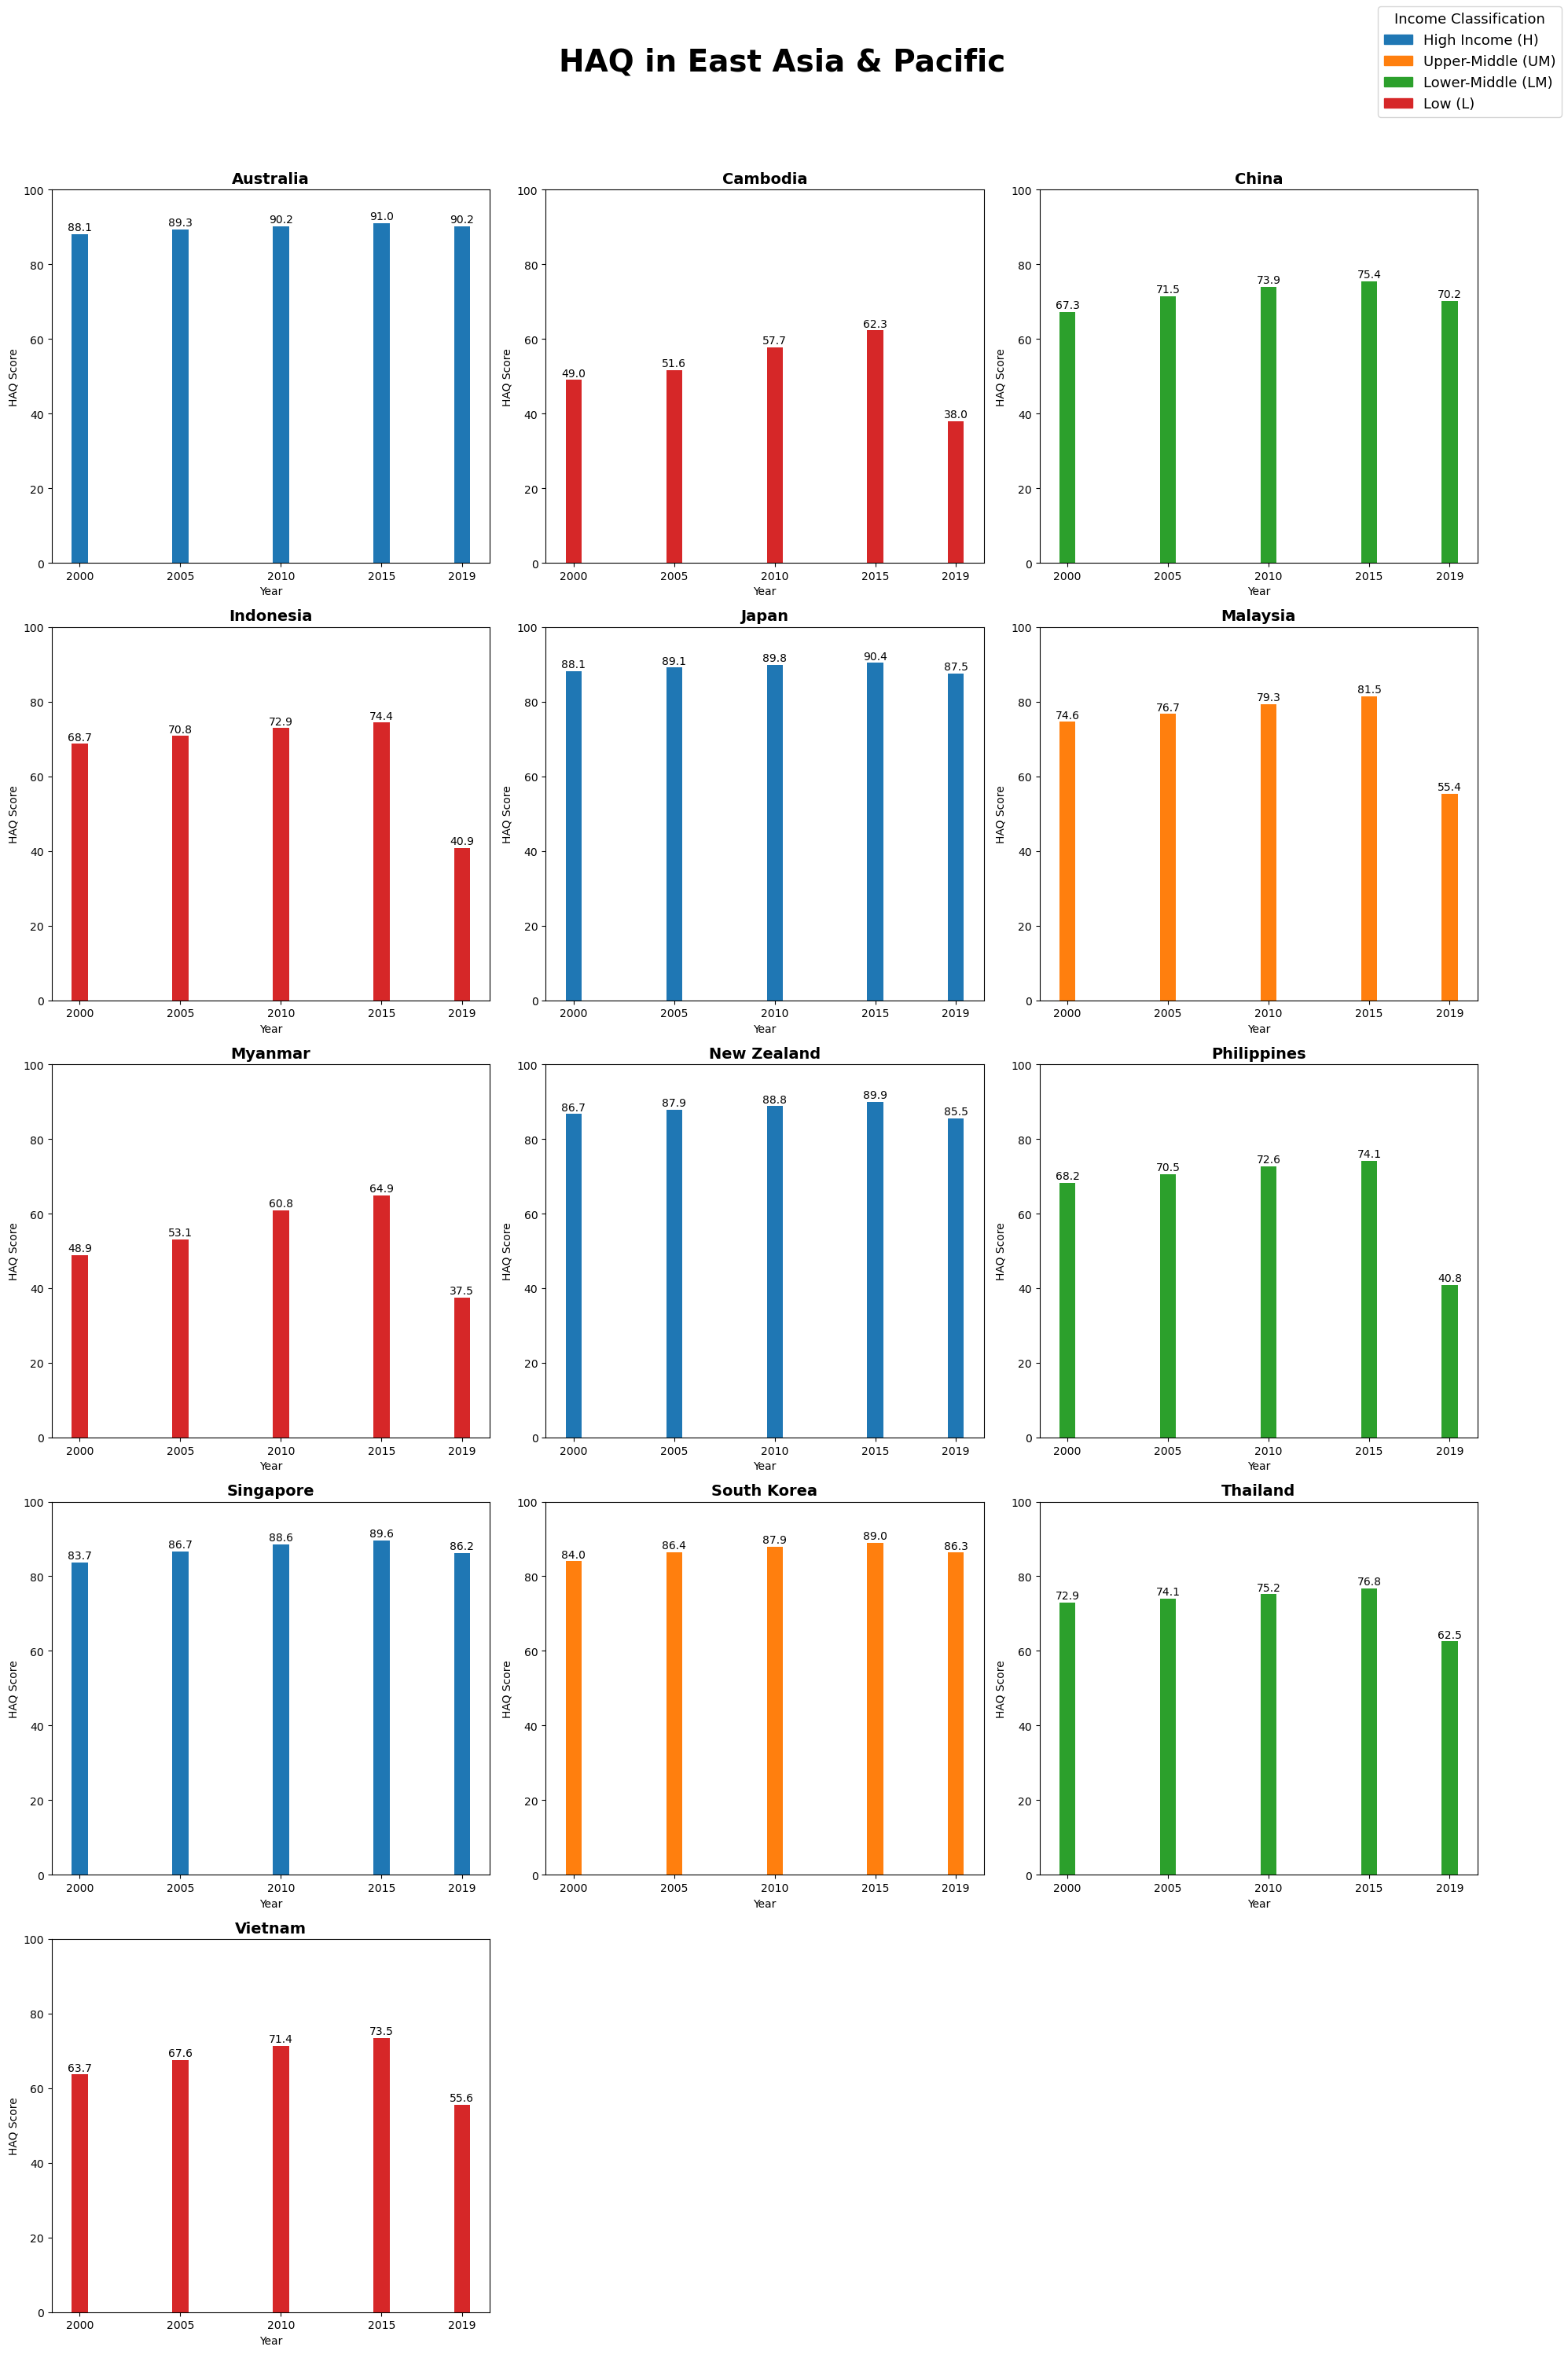

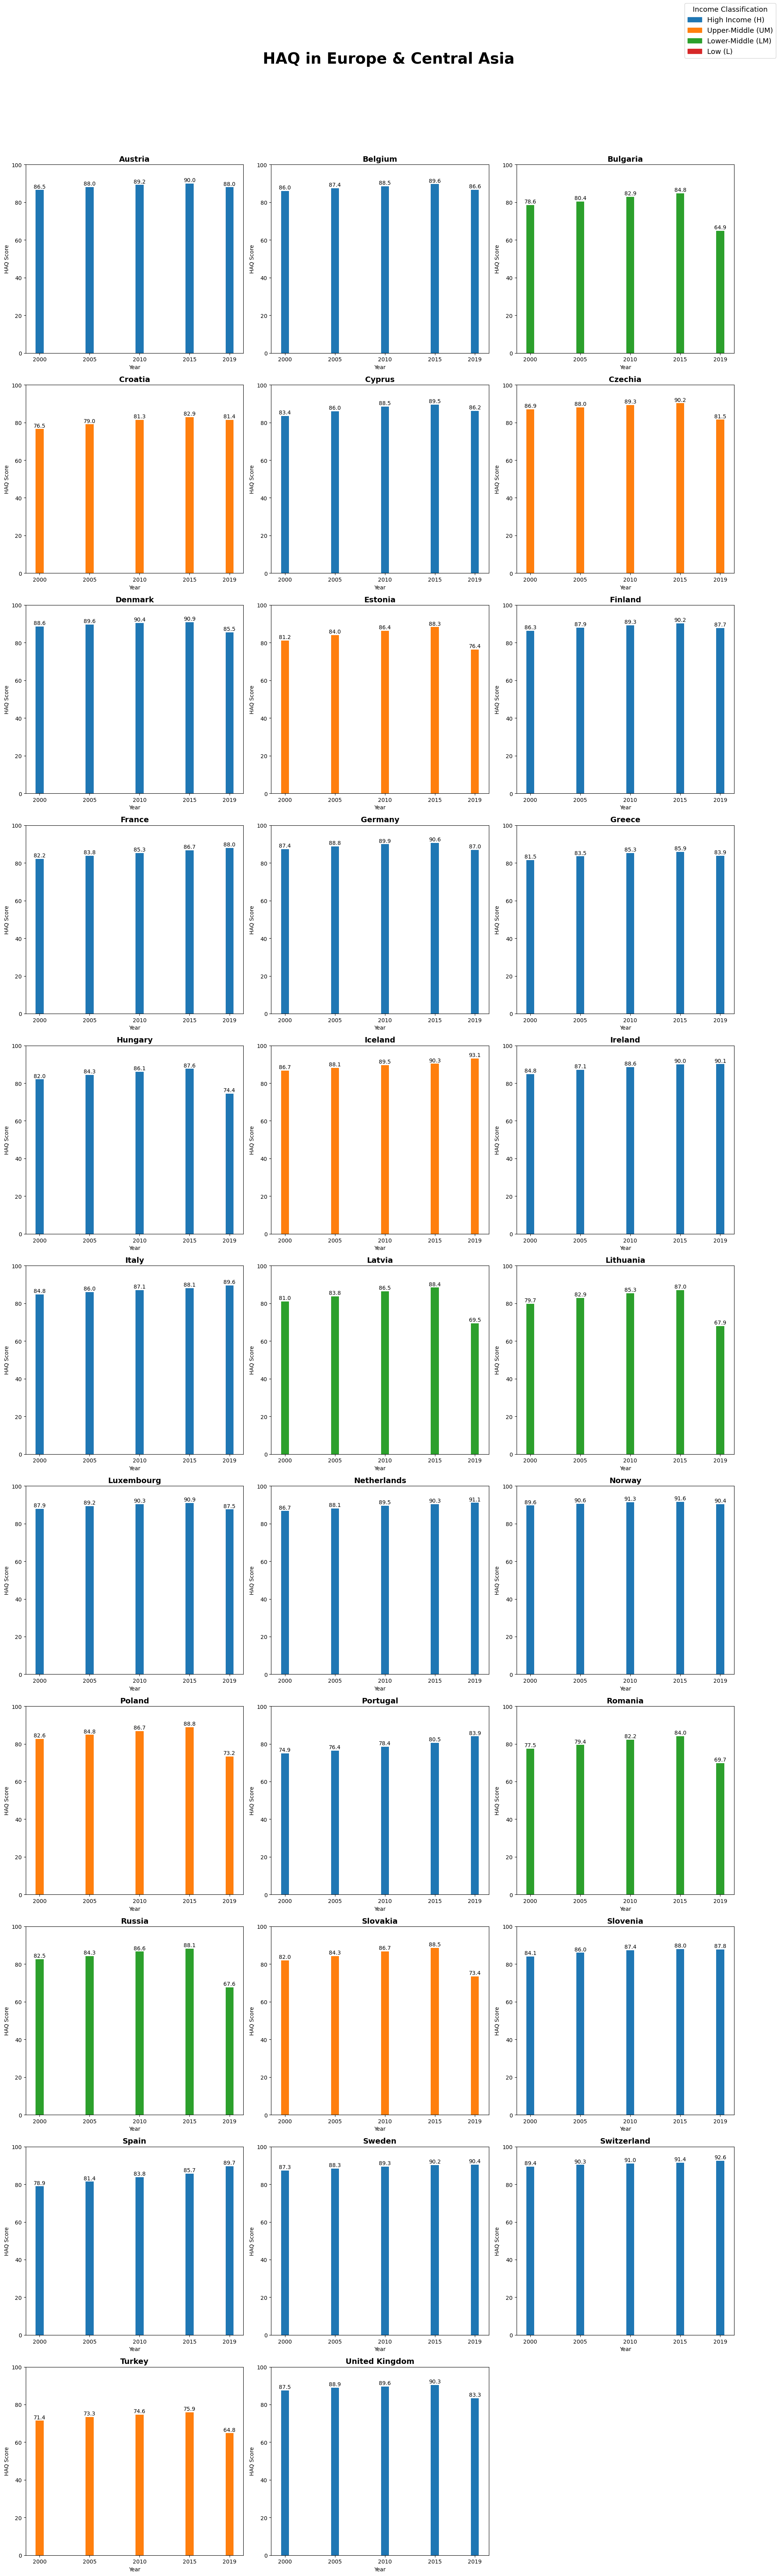

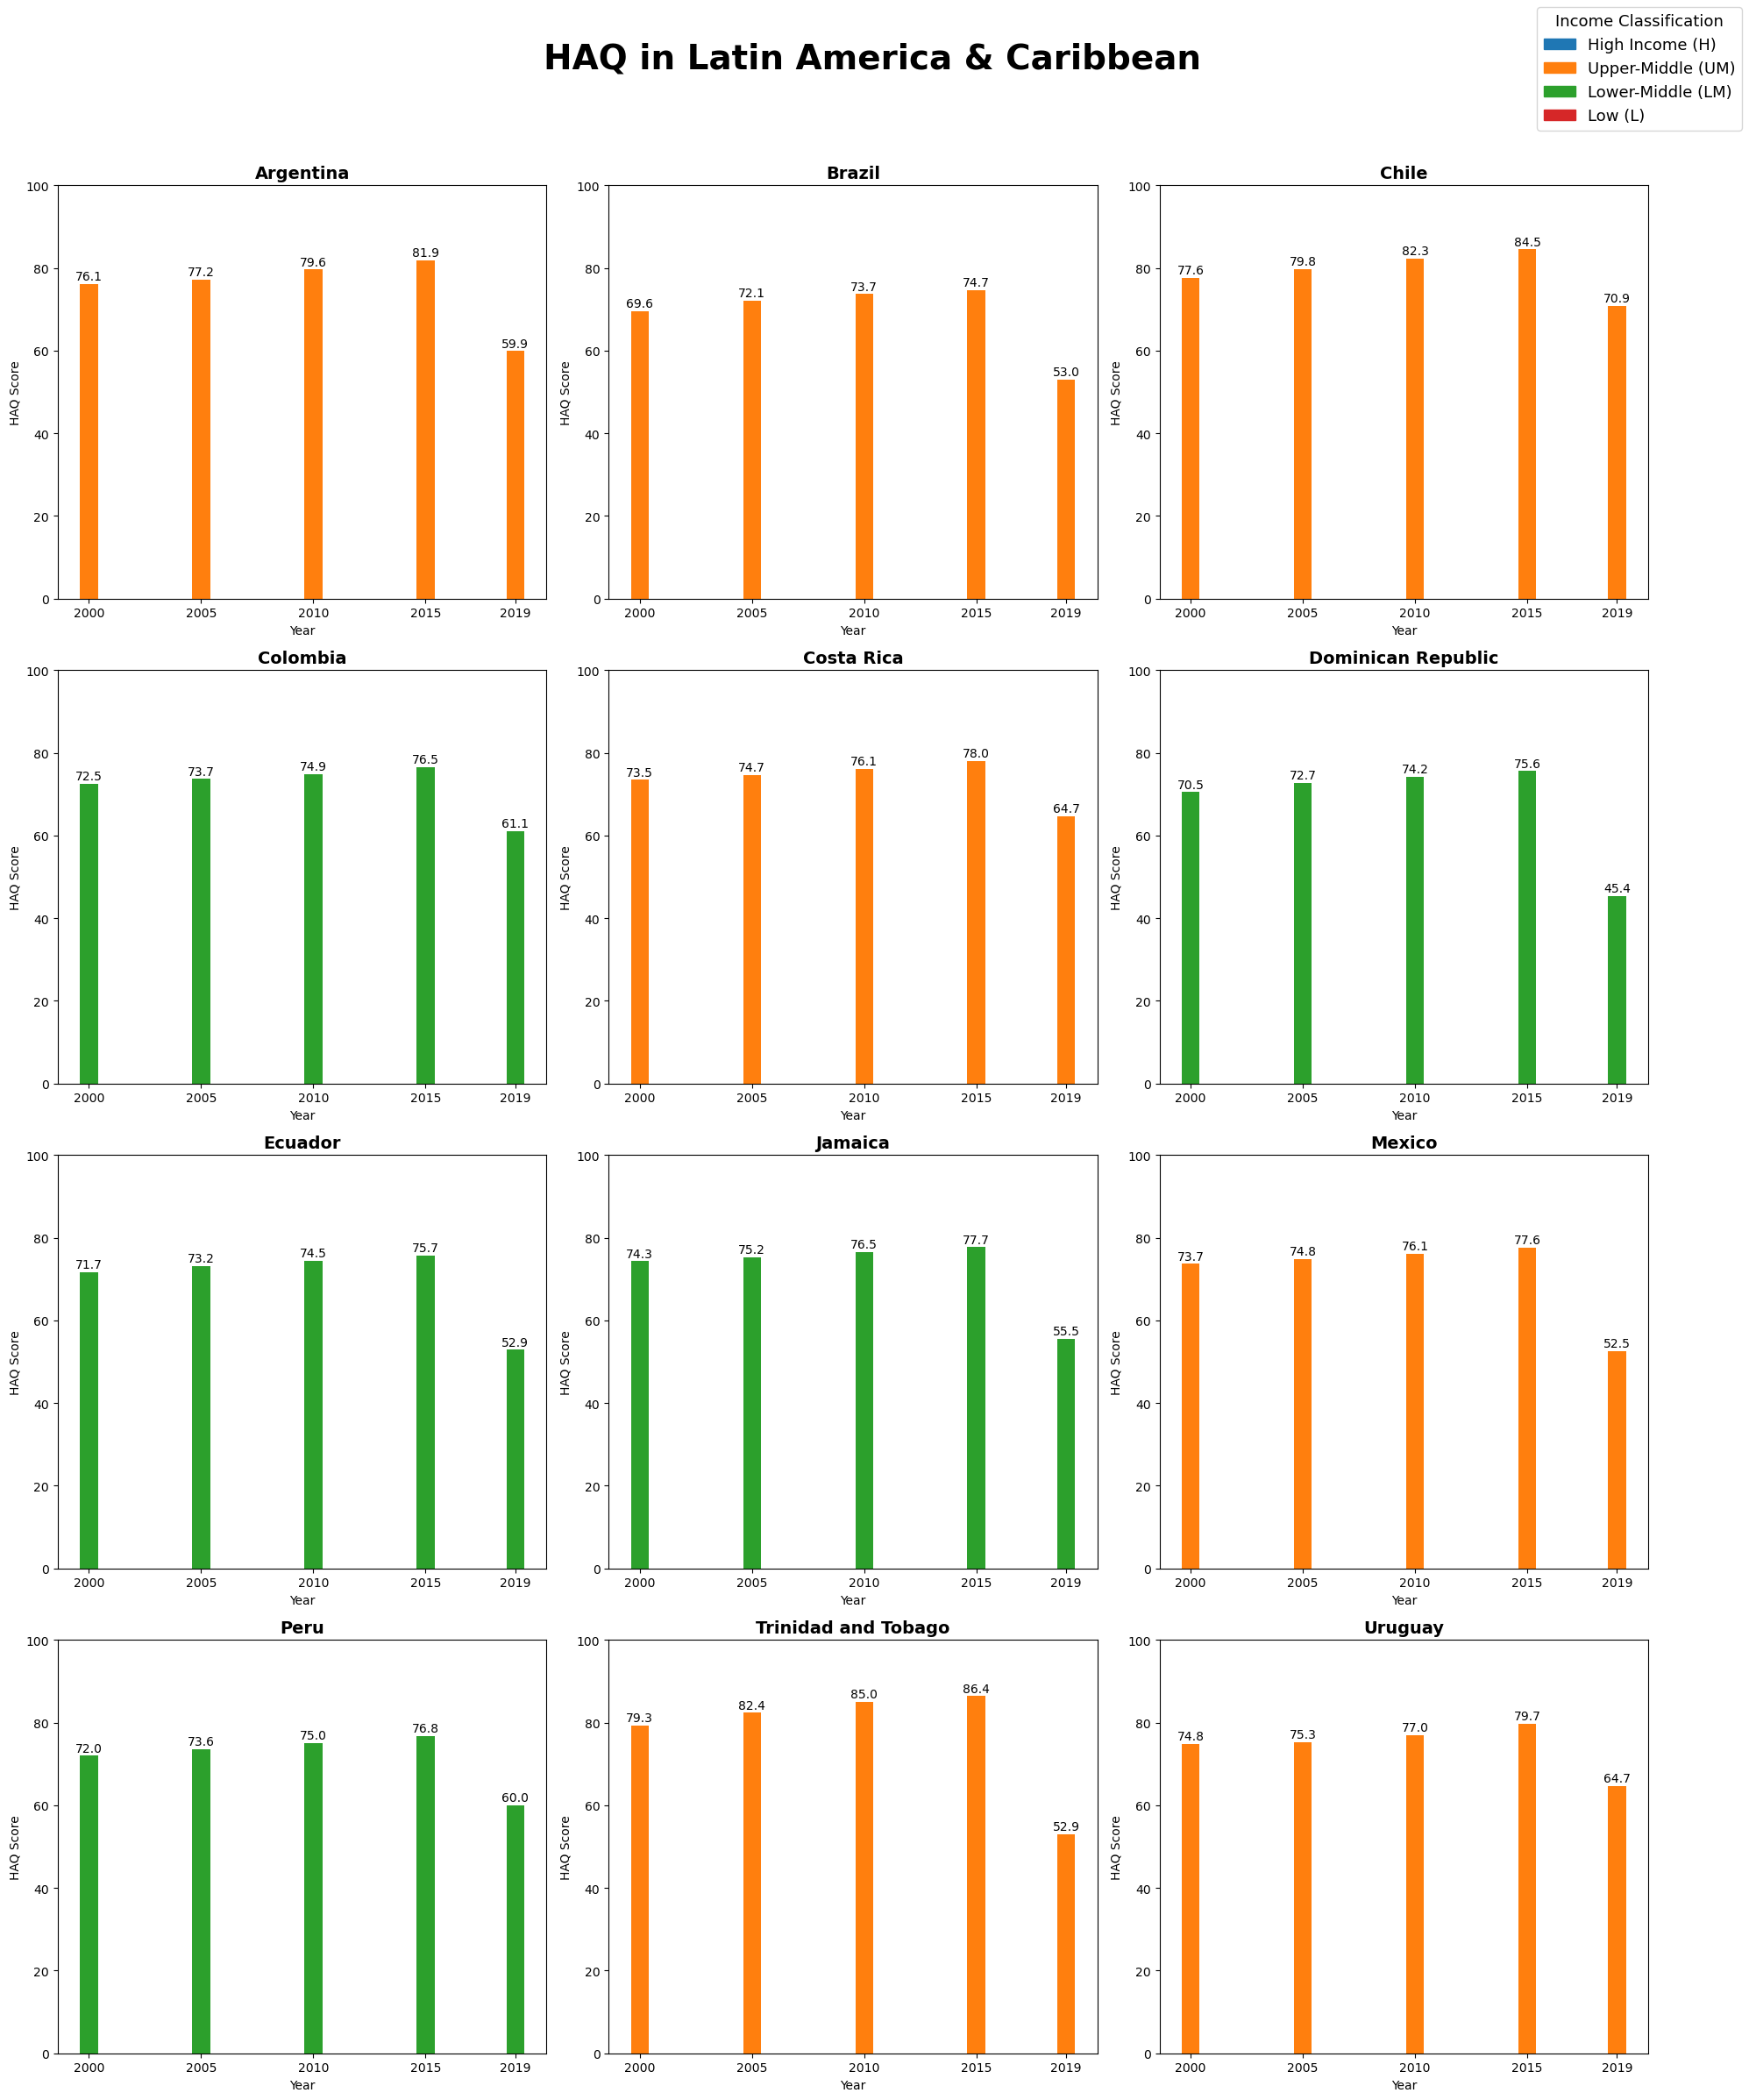

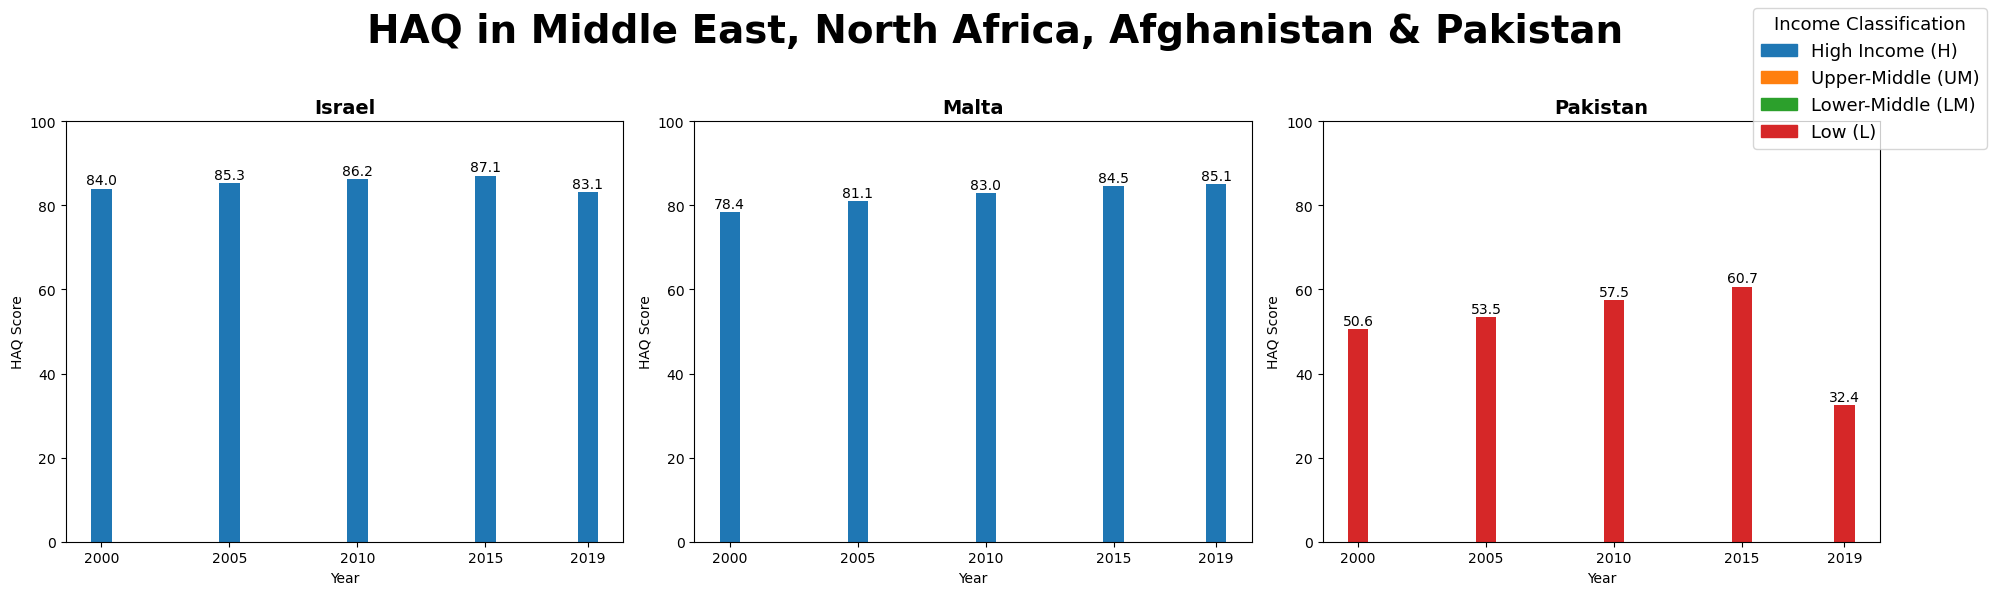

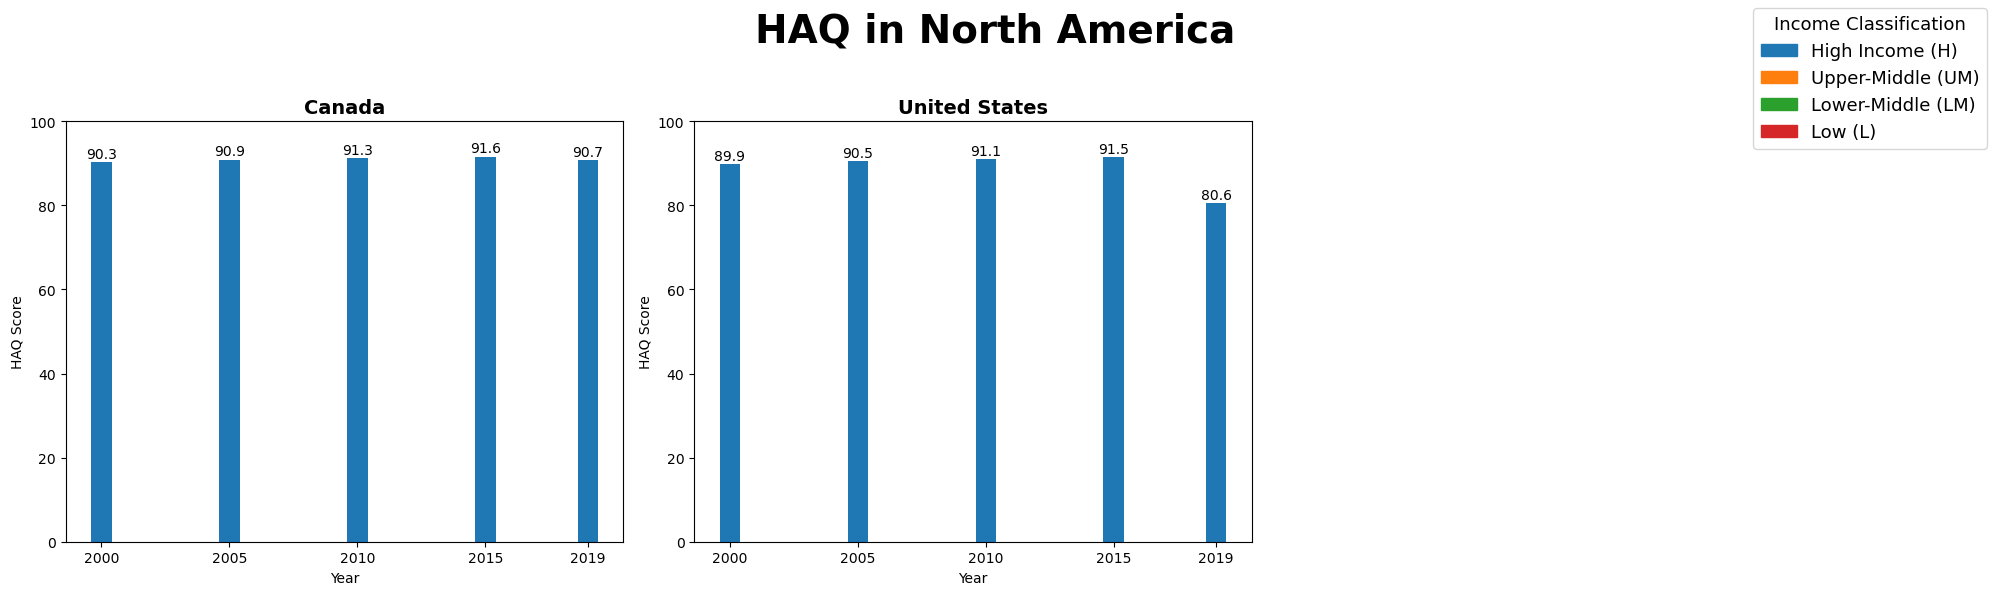

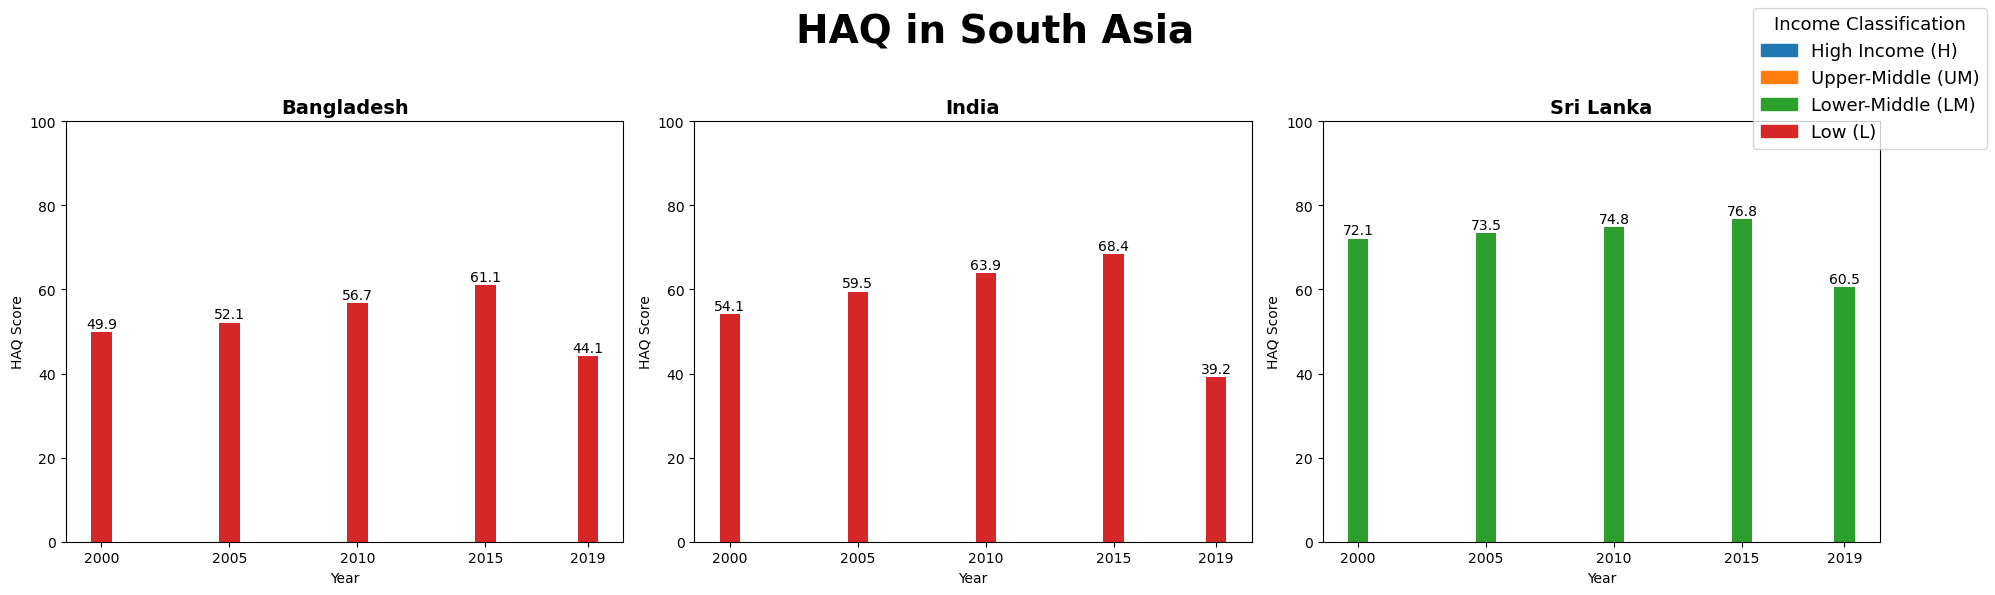

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# --- COLUMN NAMES ---
country_col = "Country"
region_col = "Region"
year_col = "Year"
haq_col = "Healthcare Access and Quality Index (HAQ)"
income_col = "Income Classification"

# Convert year to integer just to be safe
df[year_col] = df[year_col].astype(int)

# ----------------------------------------------------
# 1. DEFINE INCOME COLORS
# ----------------------------------------------------
income_colors = {
    "H": "#1f77b4",   # High income (blue)
    "UM": "#ff7f0e",  # Upper-middle (orange)
    "LM": "#2ca02c",  # Lower-middle (green)
    "L": "#d62728"    # Low income (red)
}

# ----------------------------------------------------
# 2. X-AXIS FIXED TICKS
# ----------------------------------------------------
year_ticks = [2000, 2005, 2010, 2015, 2019]

# ----------------------------------------------------
# 3. GET UNIQUE REGIONS
# ----------------------------------------------------
regions = sorted(df[region_col].dropna().unique())

# ----------------------------------------------------
# 4. LOOP THROUGH REGIONS
# ----------------------------------------------------
for region in regions:

    df_r = df[df[region_col] == region]
    countries = sorted(df_r[country_col].unique())
    n_countries = len(countries)

    cols = 3
    rows = math.ceil(n_countries / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
    axes = axes.flatten()

    # Region Title
    fig.suptitle(f"HAQ in {region}", fontsize=28, weight='bold', y=0.98)

    # ----------------------------------------------------
    # 5. PLOT EACH COUNTRY
    # ----------------------------------------------------
    for i, country in enumerate(countries):
        ax = axes[i]
        df_c = df_r[df_r[country_col] == country].sort_values(year_col)

        years = df_c[year_col]
        haq_values = df_c[haq_col]
        income_class = df_c[income_col].iloc[0]

        bar_color = income_colors.get(income_class, "gray")

        # Bar plot
        ax.bar(years, haq_values, color=bar_color)

        # Labels above bars
        for x, y in zip(years, haq_values):
            ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

        # Country title
        ax.set_title(f"{country}", fontsize=14, weight='bold')

        # Y-axis limit
        ax.set_ylim(0, 100)

        # ----------------------------------------------------
        # FIXED X-AXIS: only specific years
        # ----------------------------------------------------
        ax.set_xticks(year_ticks)
        
        # Show only ticks present in this country's data
        ax.set_xticklabels([str(y) if y in years.values else "" for y in year_ticks],
                           rotation=0, fontsize=10)

        ax.set_xlabel("Year")
        ax.set_ylabel("HAQ Score")

    # Remove empty subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    # ----------------------------------------------------
    # 6. INCOME CLASSIFICATION LEGEND
    # ----------------------------------------------------
    handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
    labels = ["High Income (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low (L)"]

    fig.legend(handles, labels, title="Income Classification",
               loc="upper right", fontsize=13, title_fontsize=13)

    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    filename = f"boxregion_income_{region.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


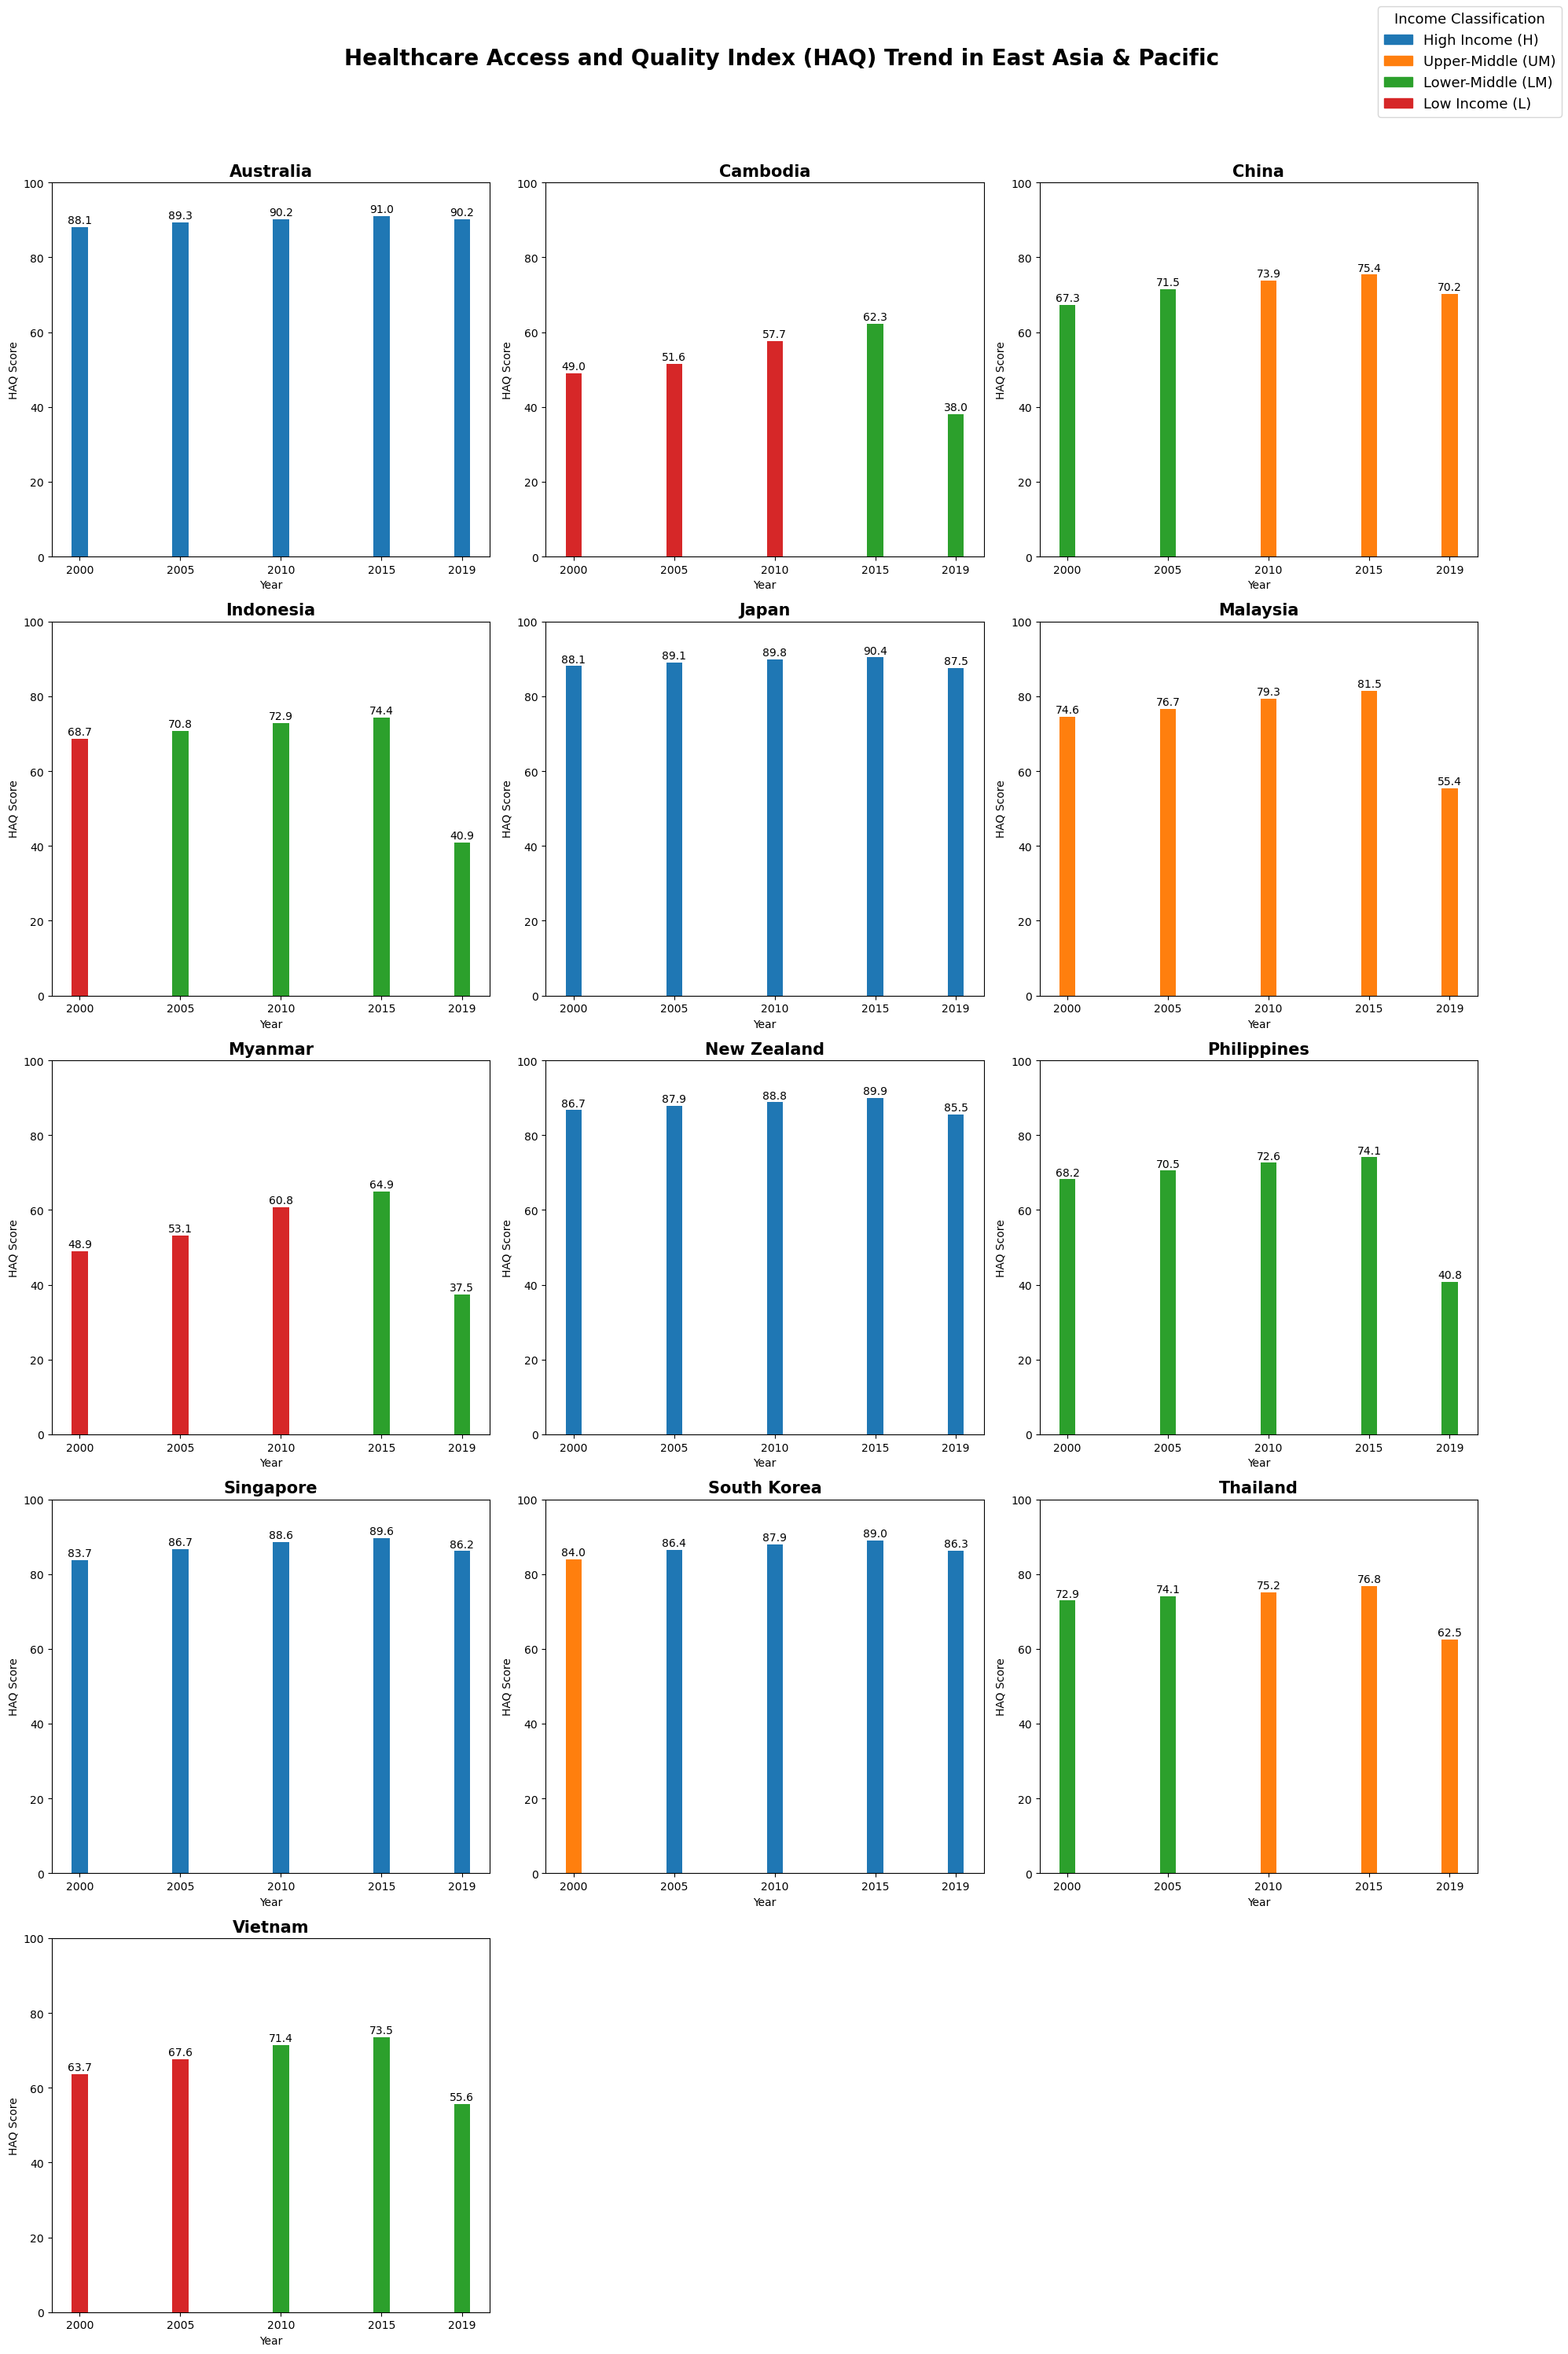

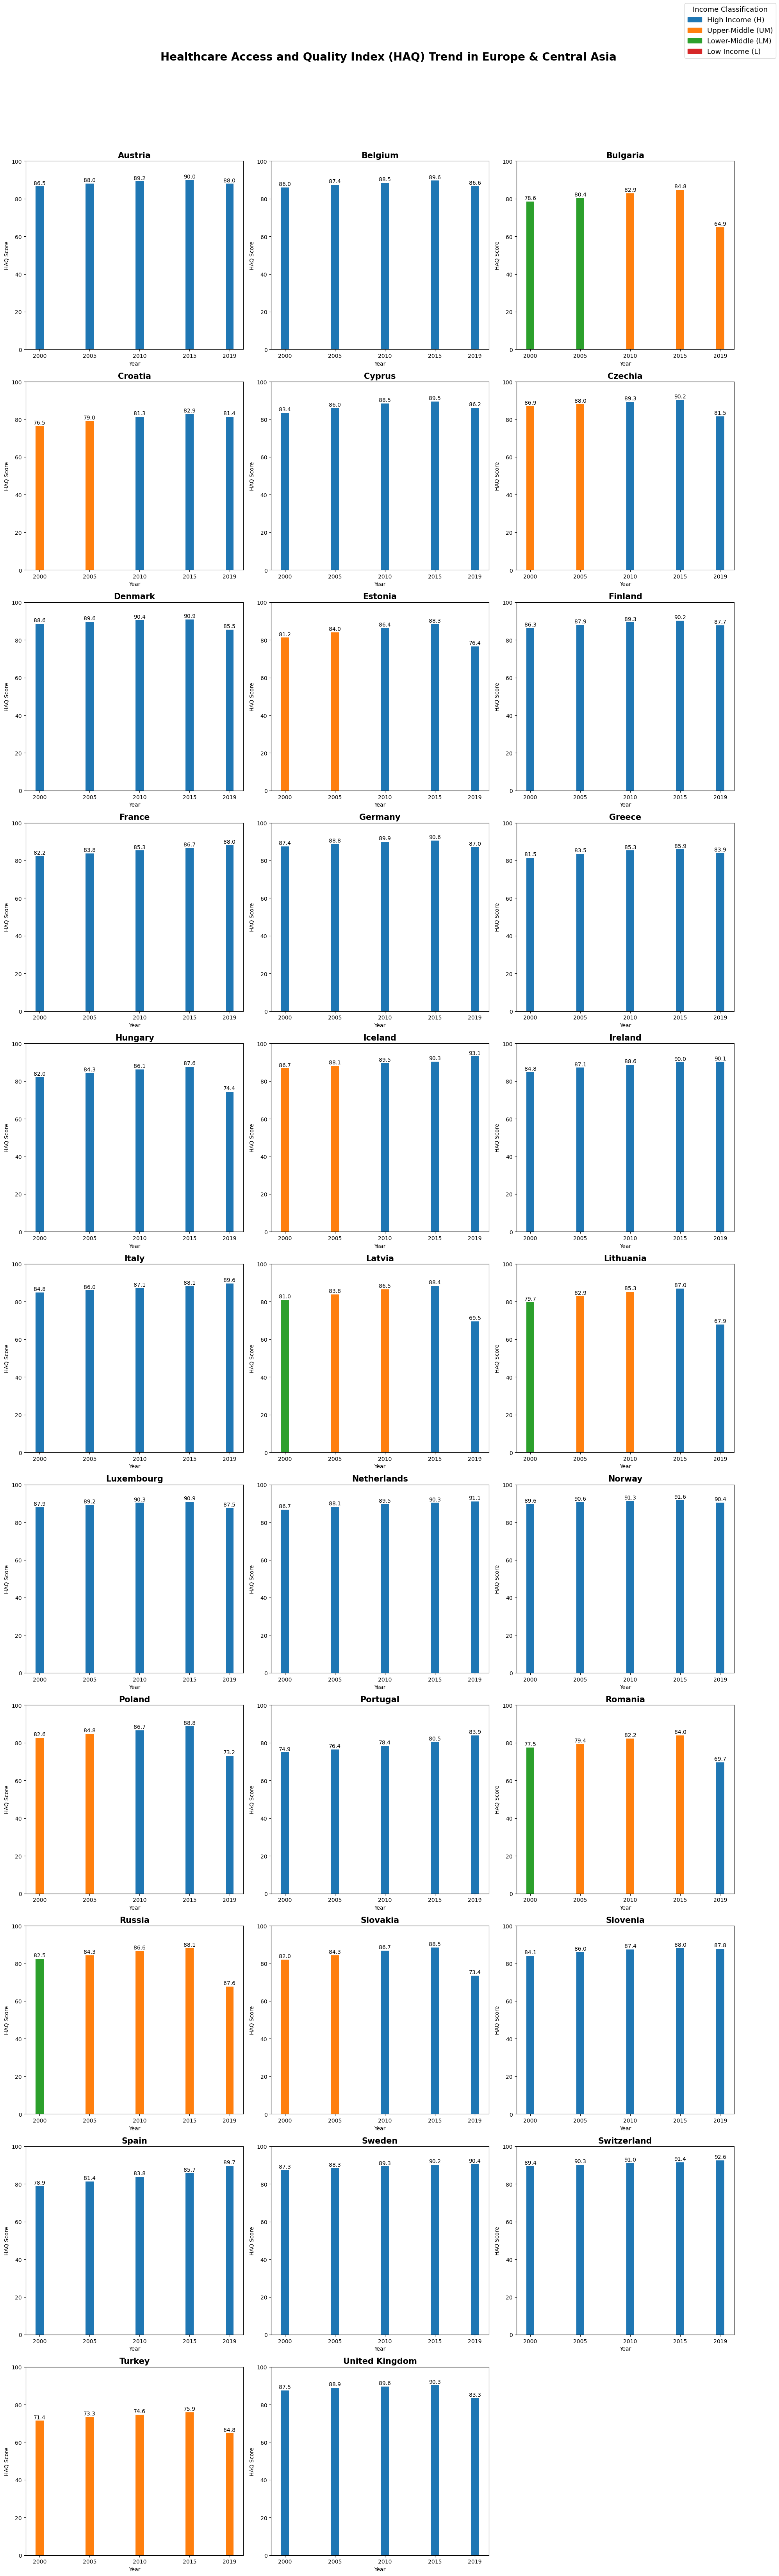

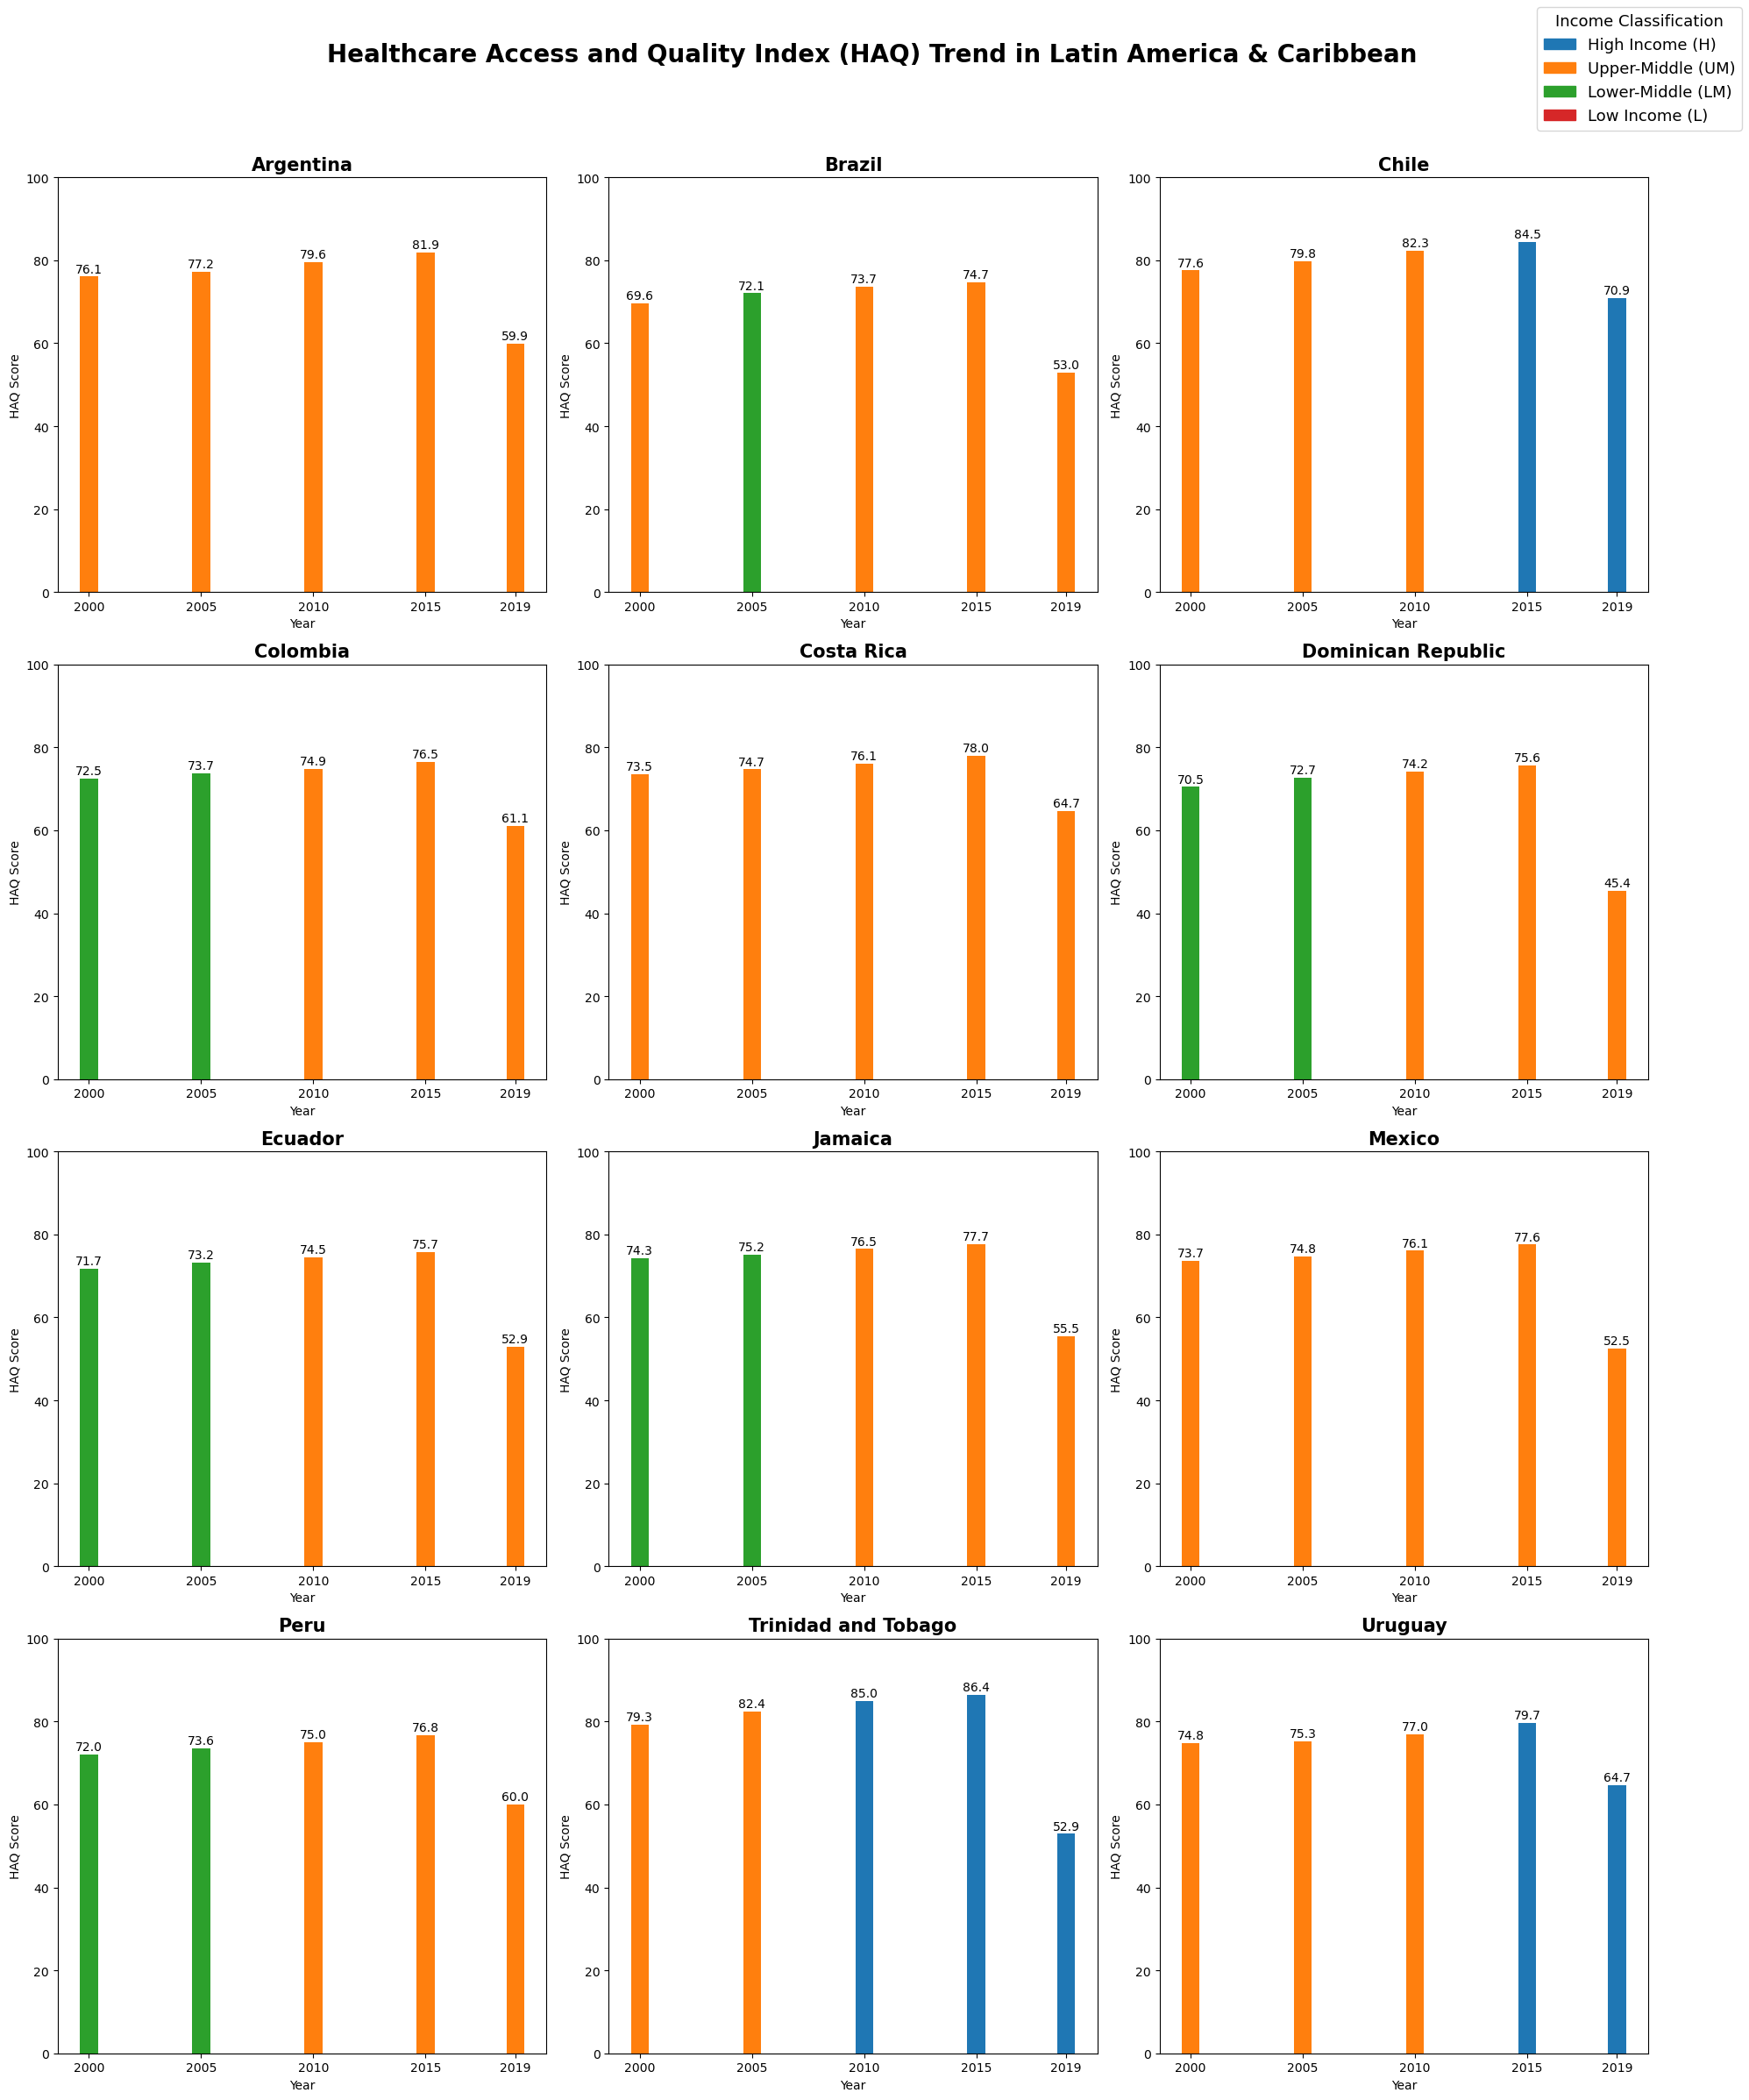

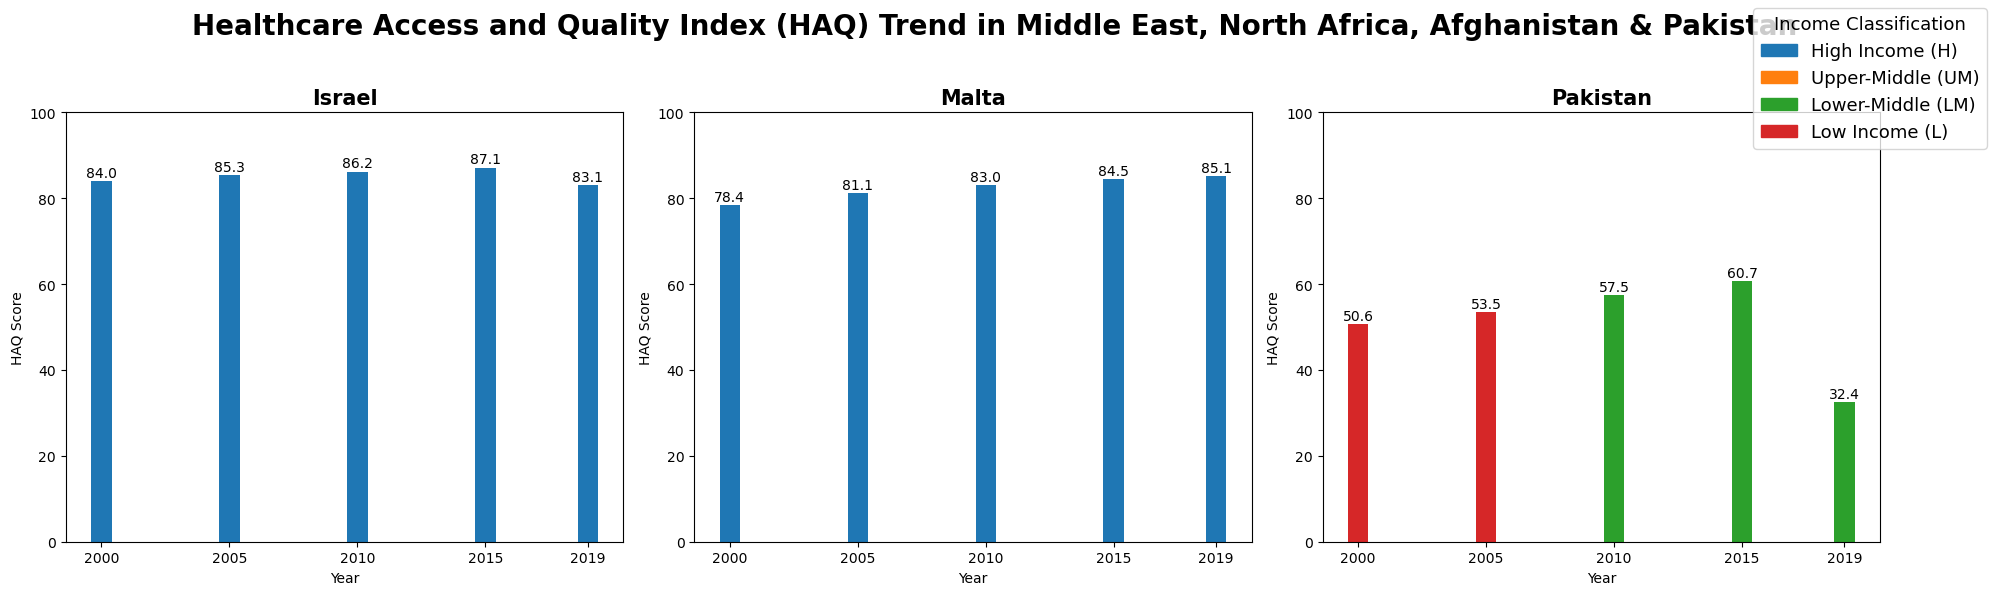

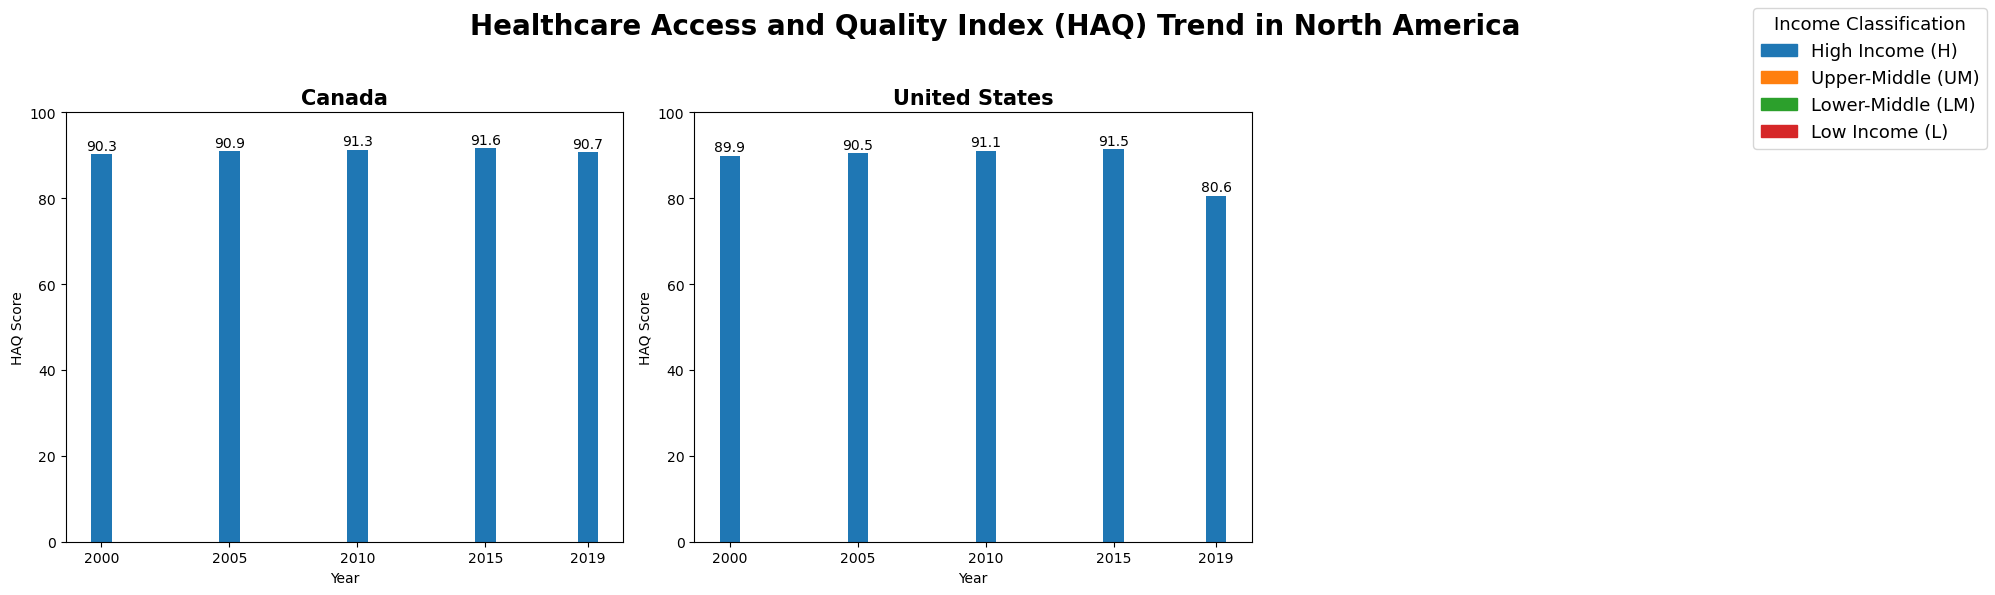

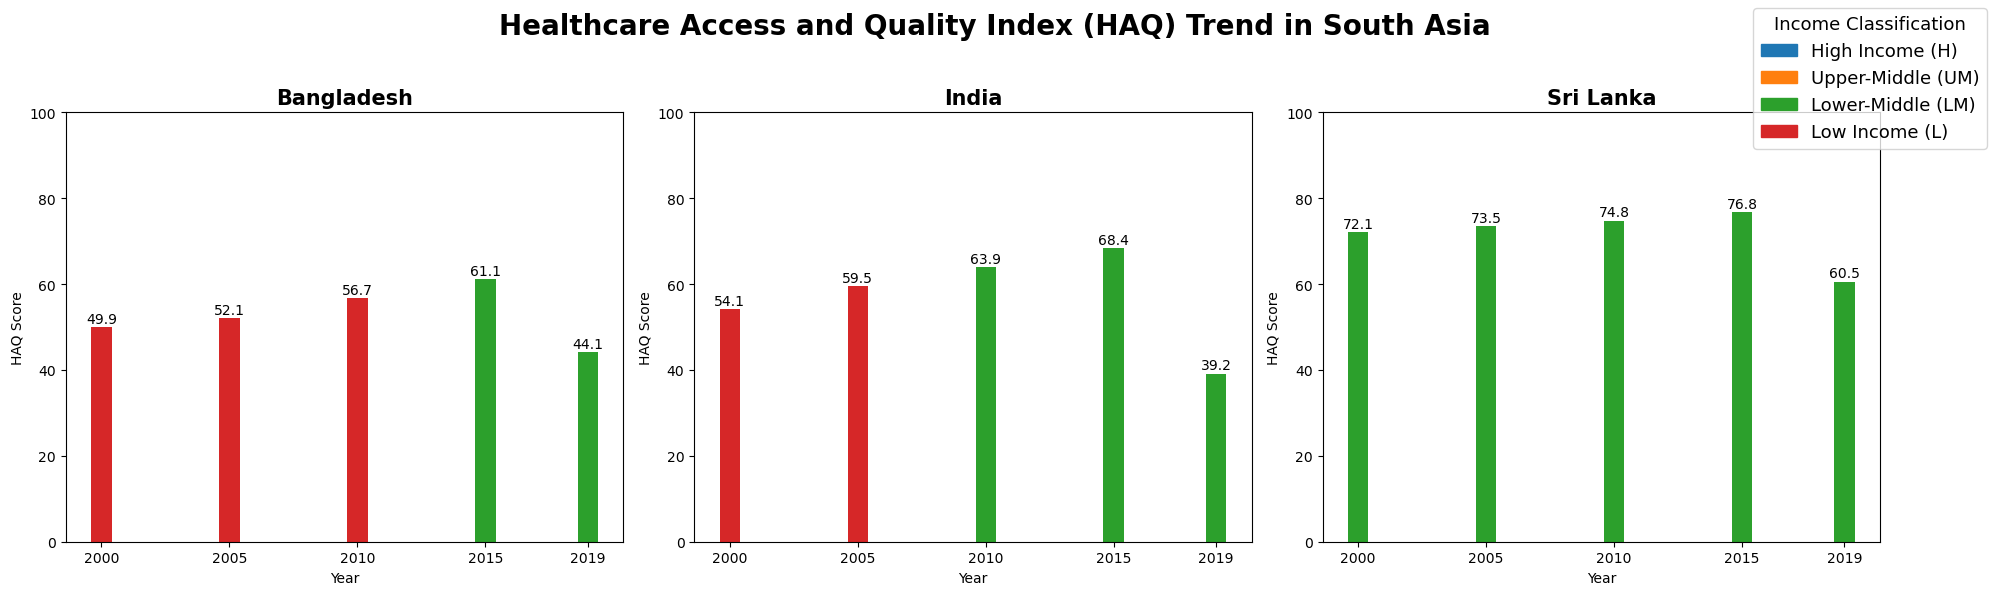

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# --- COLUMN NAMES ---
country_col = "Country"
region_col = "Region"
year_col = "Year"
haq_col = "Healthcare Access and Quality Index (HAQ)"
income_col = "Income Classification"

# Force year to integer
df[year_col] = df[year_col].astype(int)

# ----------------------------------------------------
# 1. DEFINE INCOME COLORS
# ----------------------------------------------------
income_colors = {
    "H": "#1f77b4",     # High income
    "UM": "#ff7f0e",    # Upper-middle
    "LM": "#2ca02c",    # Lower-middle
    "L": "#d62728"      # Low income
}

# Auto-map full names → abbreviations
clean_income = {
    "High income": "H",
    "Upper middle income": "UM",
    "Lower middle income": "LM",
    "Low income": "L"
}

# Clean the column so values match keys
df[income_col] = df[income_col].replace(clean_income)

# ----------------------------------------------------
# 2. FIXED X-AXIS TICKS
# ----------------------------------------------------
year_ticks = [2000, 2005, 2010, 2015, 2019]

# ----------------------------------------------------
# 3. GROUP BY REGION
# ----------------------------------------------------
regions = sorted(df[region_col].dropna().unique())

for region in regions:

    df_r = df[df[region_col] == region]
    countries = sorted(df_r[country_col].unique())
    n_countries = len(countries)

    cols = 3
    rows = math.ceil(n_countries / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
    axes = axes.flatten()

    fig.suptitle(f"Healthcare Access and Quality Index (HAQ) Trend in {region}", fontsize=20, weight='bold', y=0.98)

    # ----------------------------------------------------
    # 4. PLOT PER COUNTRY
    # ----------------------------------------------------
    for i, country in enumerate(countries):
        ax = axes[i]
        df_c = df_r[df_r[country_col] == country].sort_values(year_col)

        years = df_c[year_col]
        haq_values = df_c[haq_col]

        # --- FIXED: Color per year instead of per country ---
        bar_colors = df_c[income_col].map(income_colors).fillna("gray")

        ax.bar(years, haq_values, color=bar_colors)

        # Add value labels
        for x, y in zip(years, haq_values):
            ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

        ax.set_title(country, fontsize=15, weight='bold')
        ax.set_ylim(0, 100)

        # Fixed X axis ticks
        ax.set_xticks(year_ticks)
        ax.set_xticklabels(
            [str(y) if y in years.values else "" for y in year_ticks],
            fontsize=10
        )

        ax.set_xlabel("Year")
        ax.set_ylabel("HAQ Score")

    # Remove blank subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    # ----------------------------------------------------
    # 5. INCOME CLASSIFICATION LEGEND
    # ----------------------------------------------------
    handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
    labels = ["High Income (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low Income (L)"]

    fig.legend(
        handles, labels,
        title="Income Classification",
        loc="upper right", fontsize=13, title_fontsize=13
    )

    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    filename = f"box2region_income_{region.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()
  

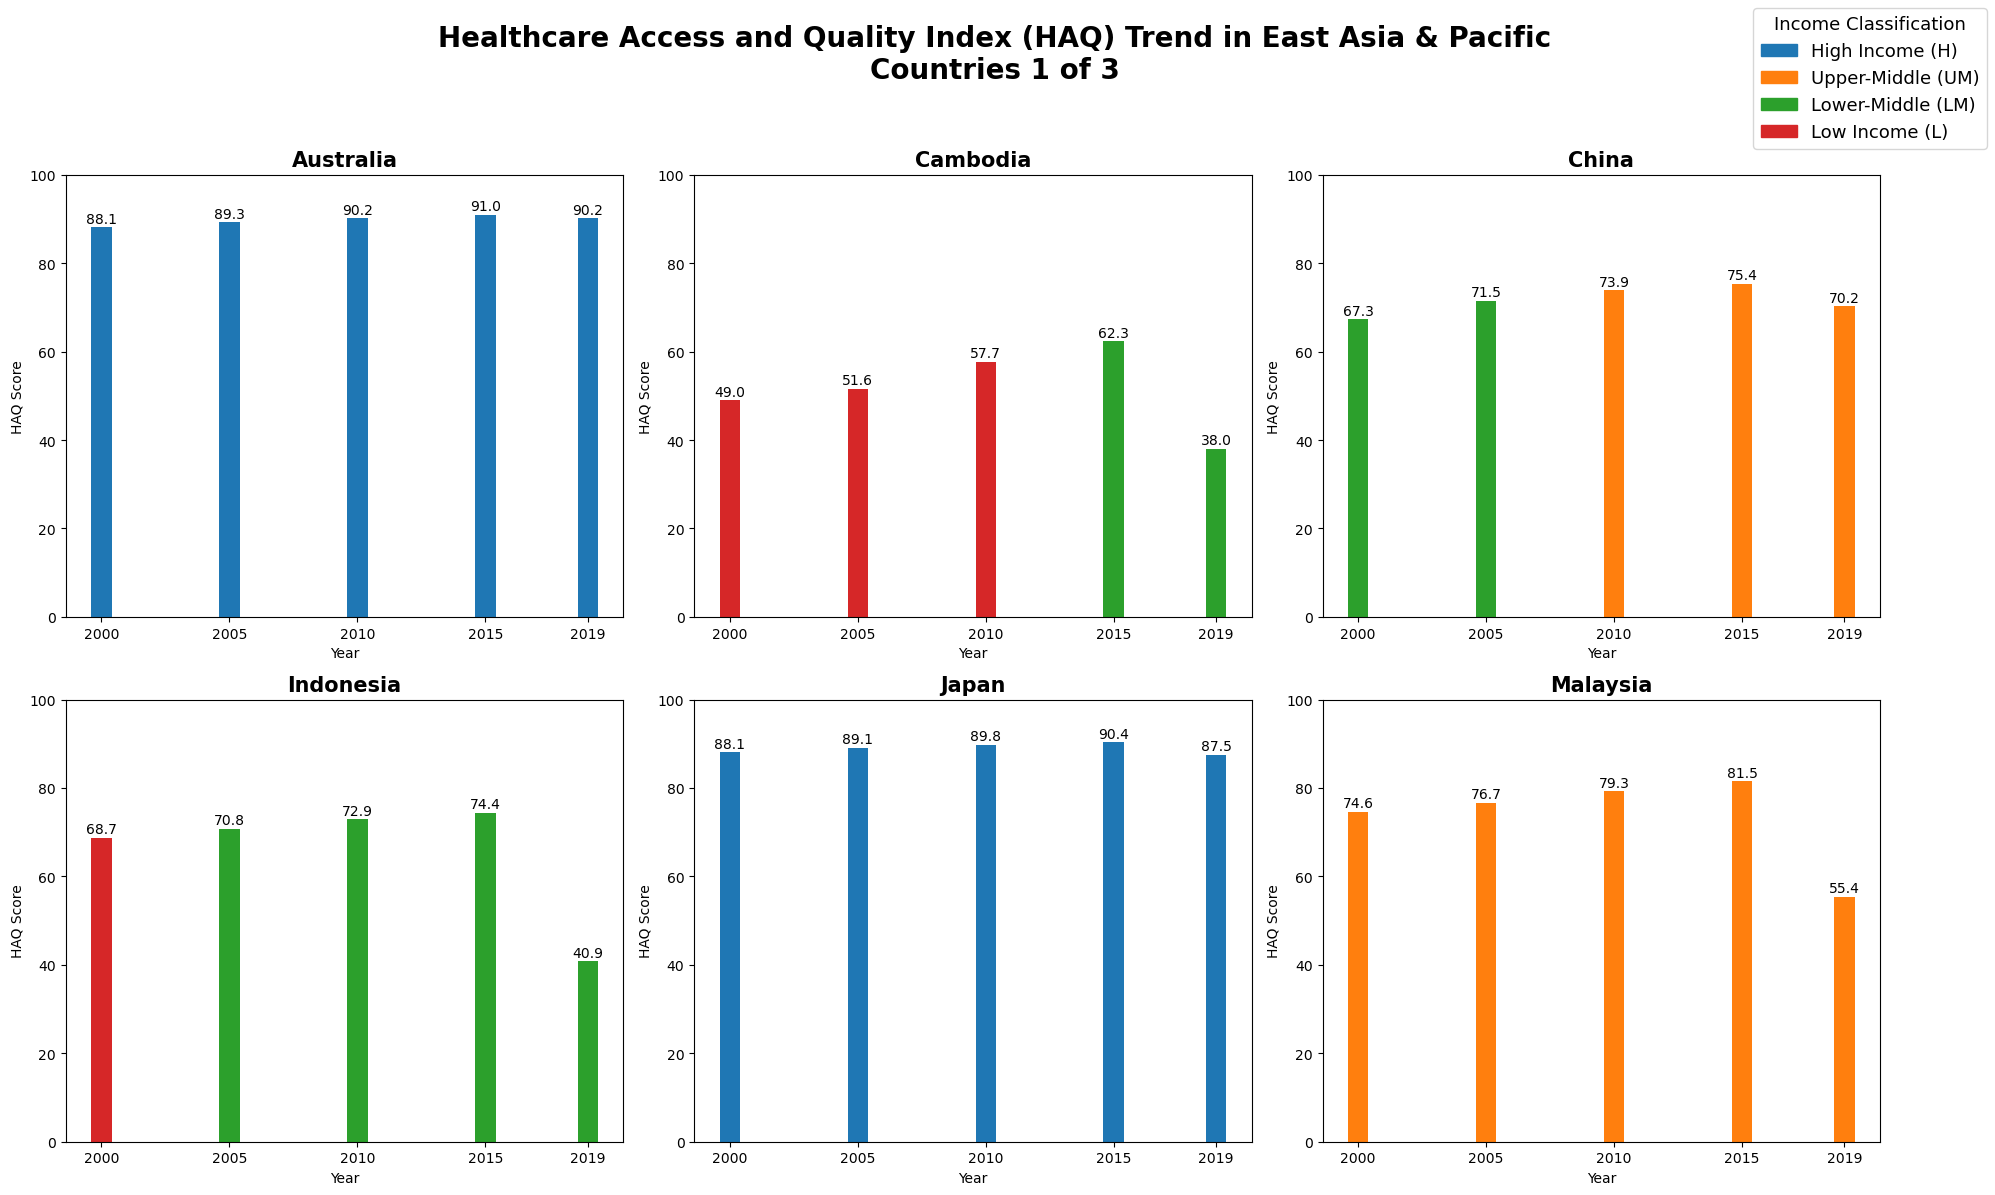

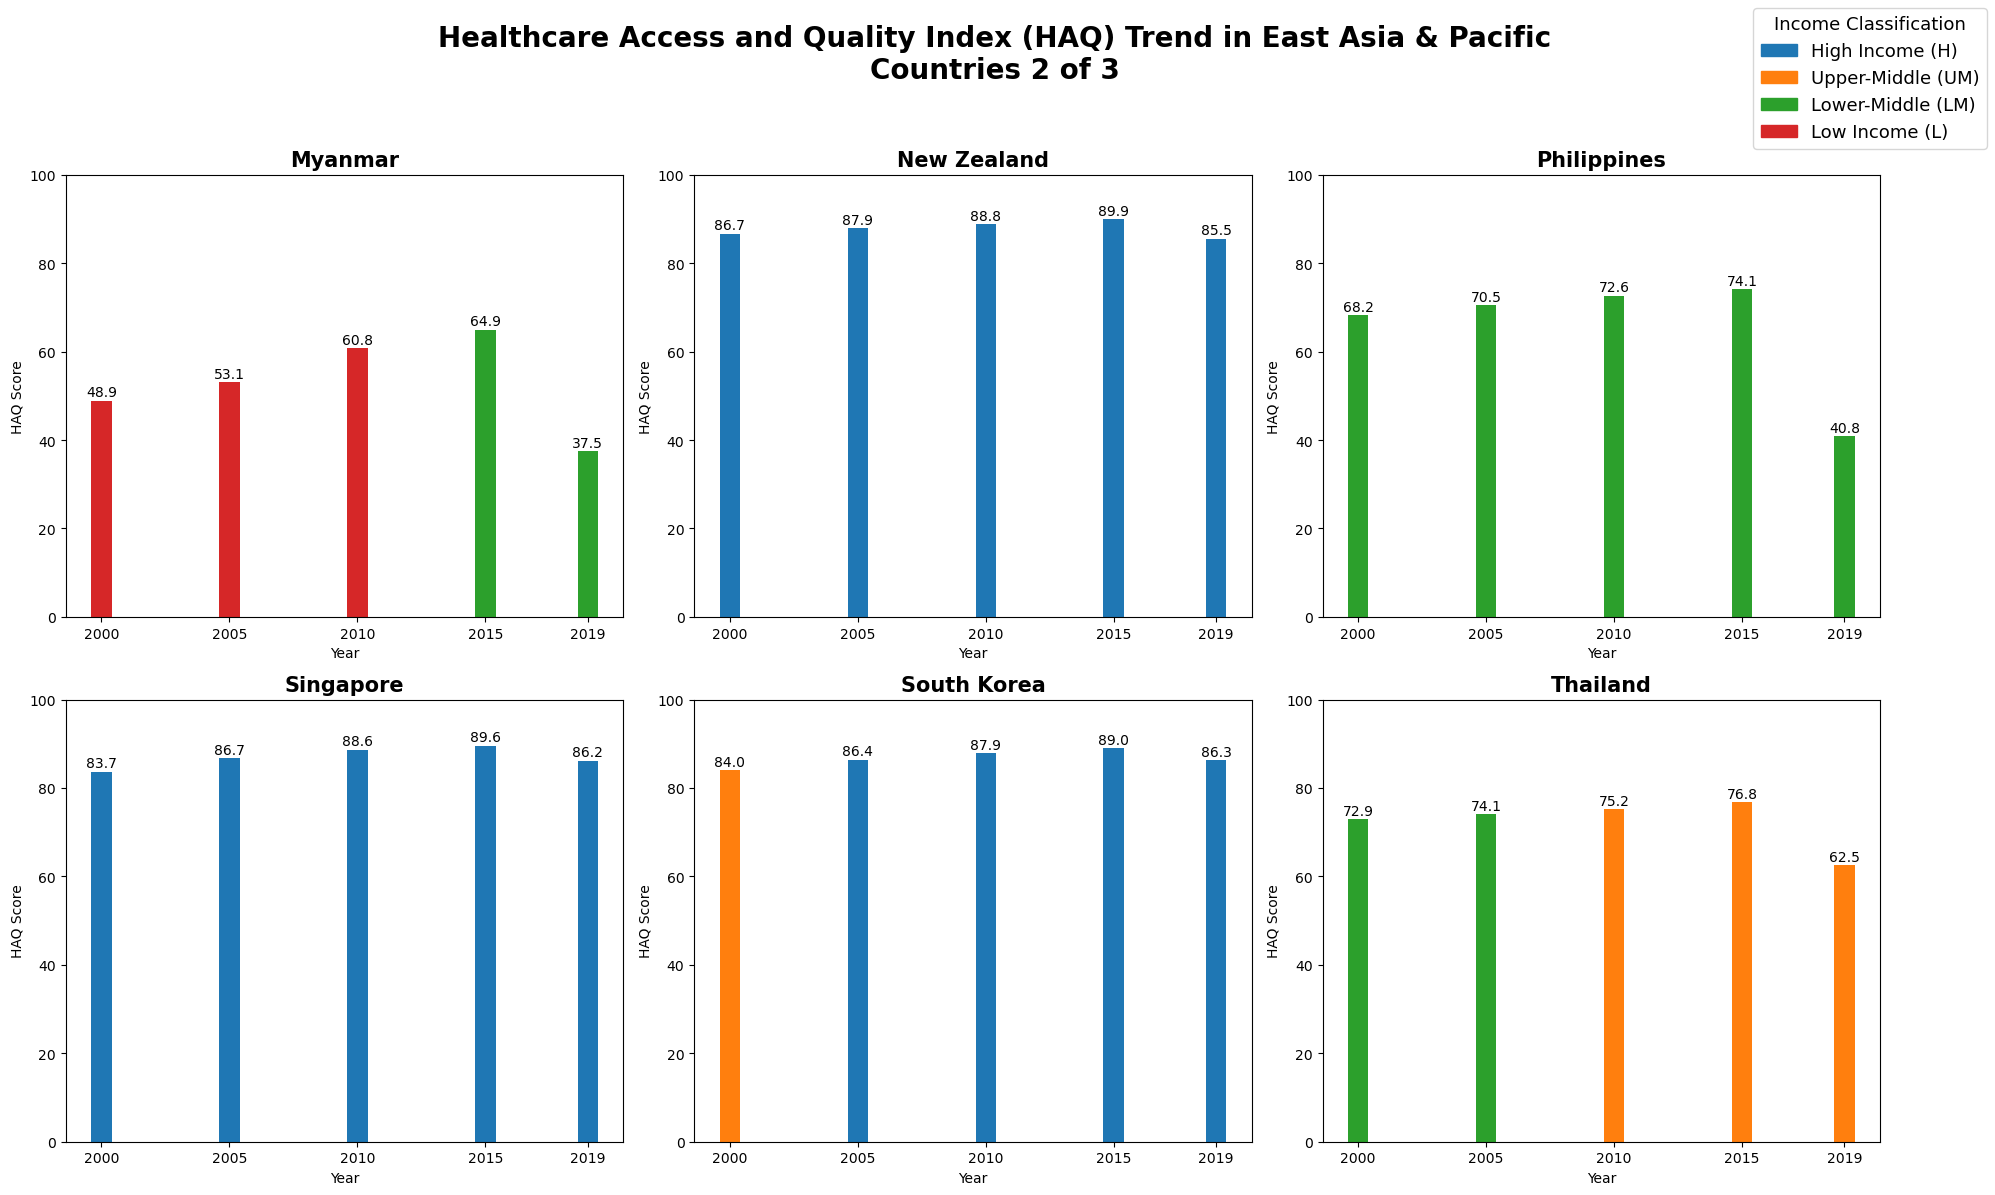

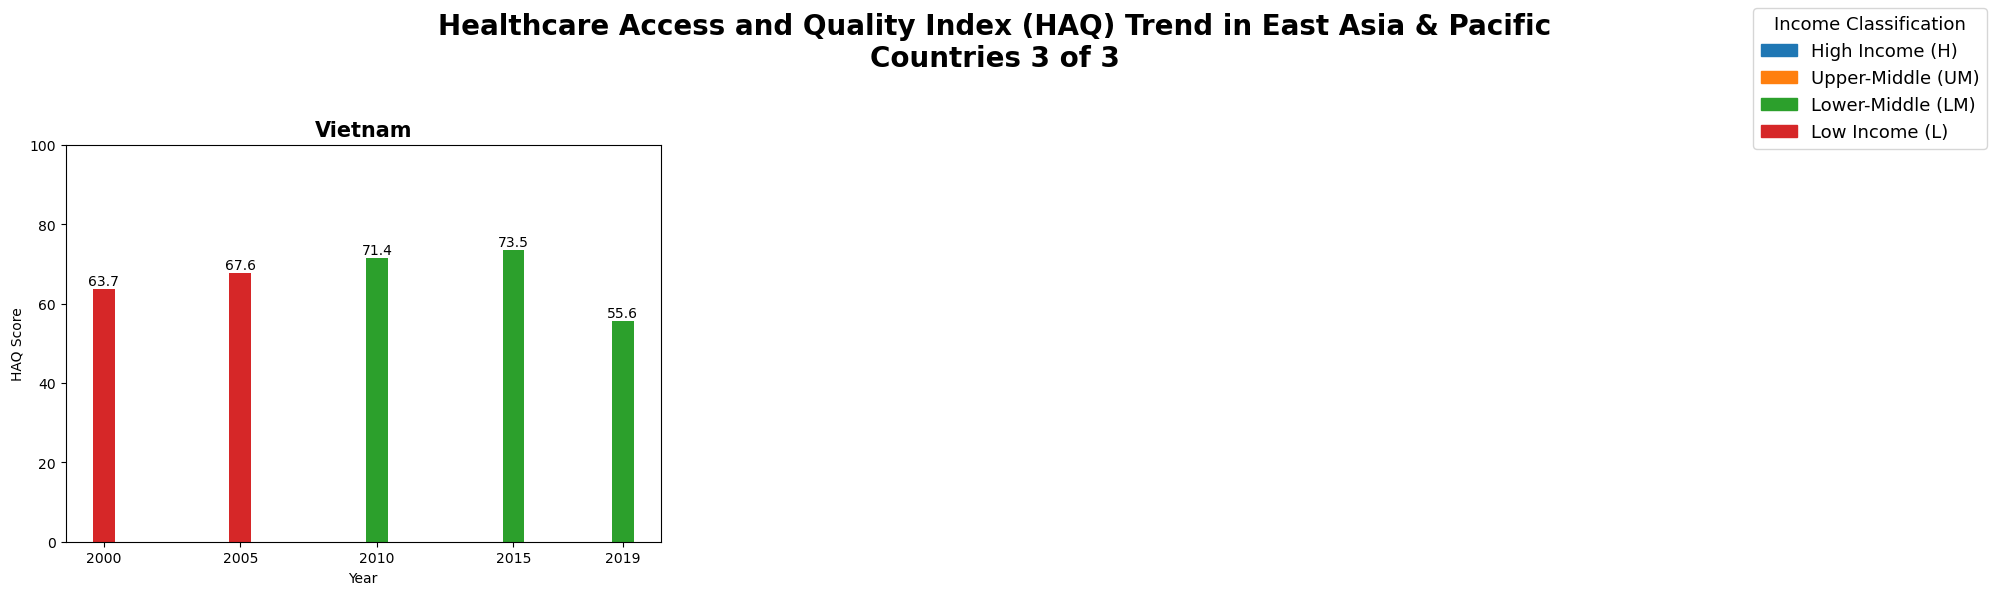

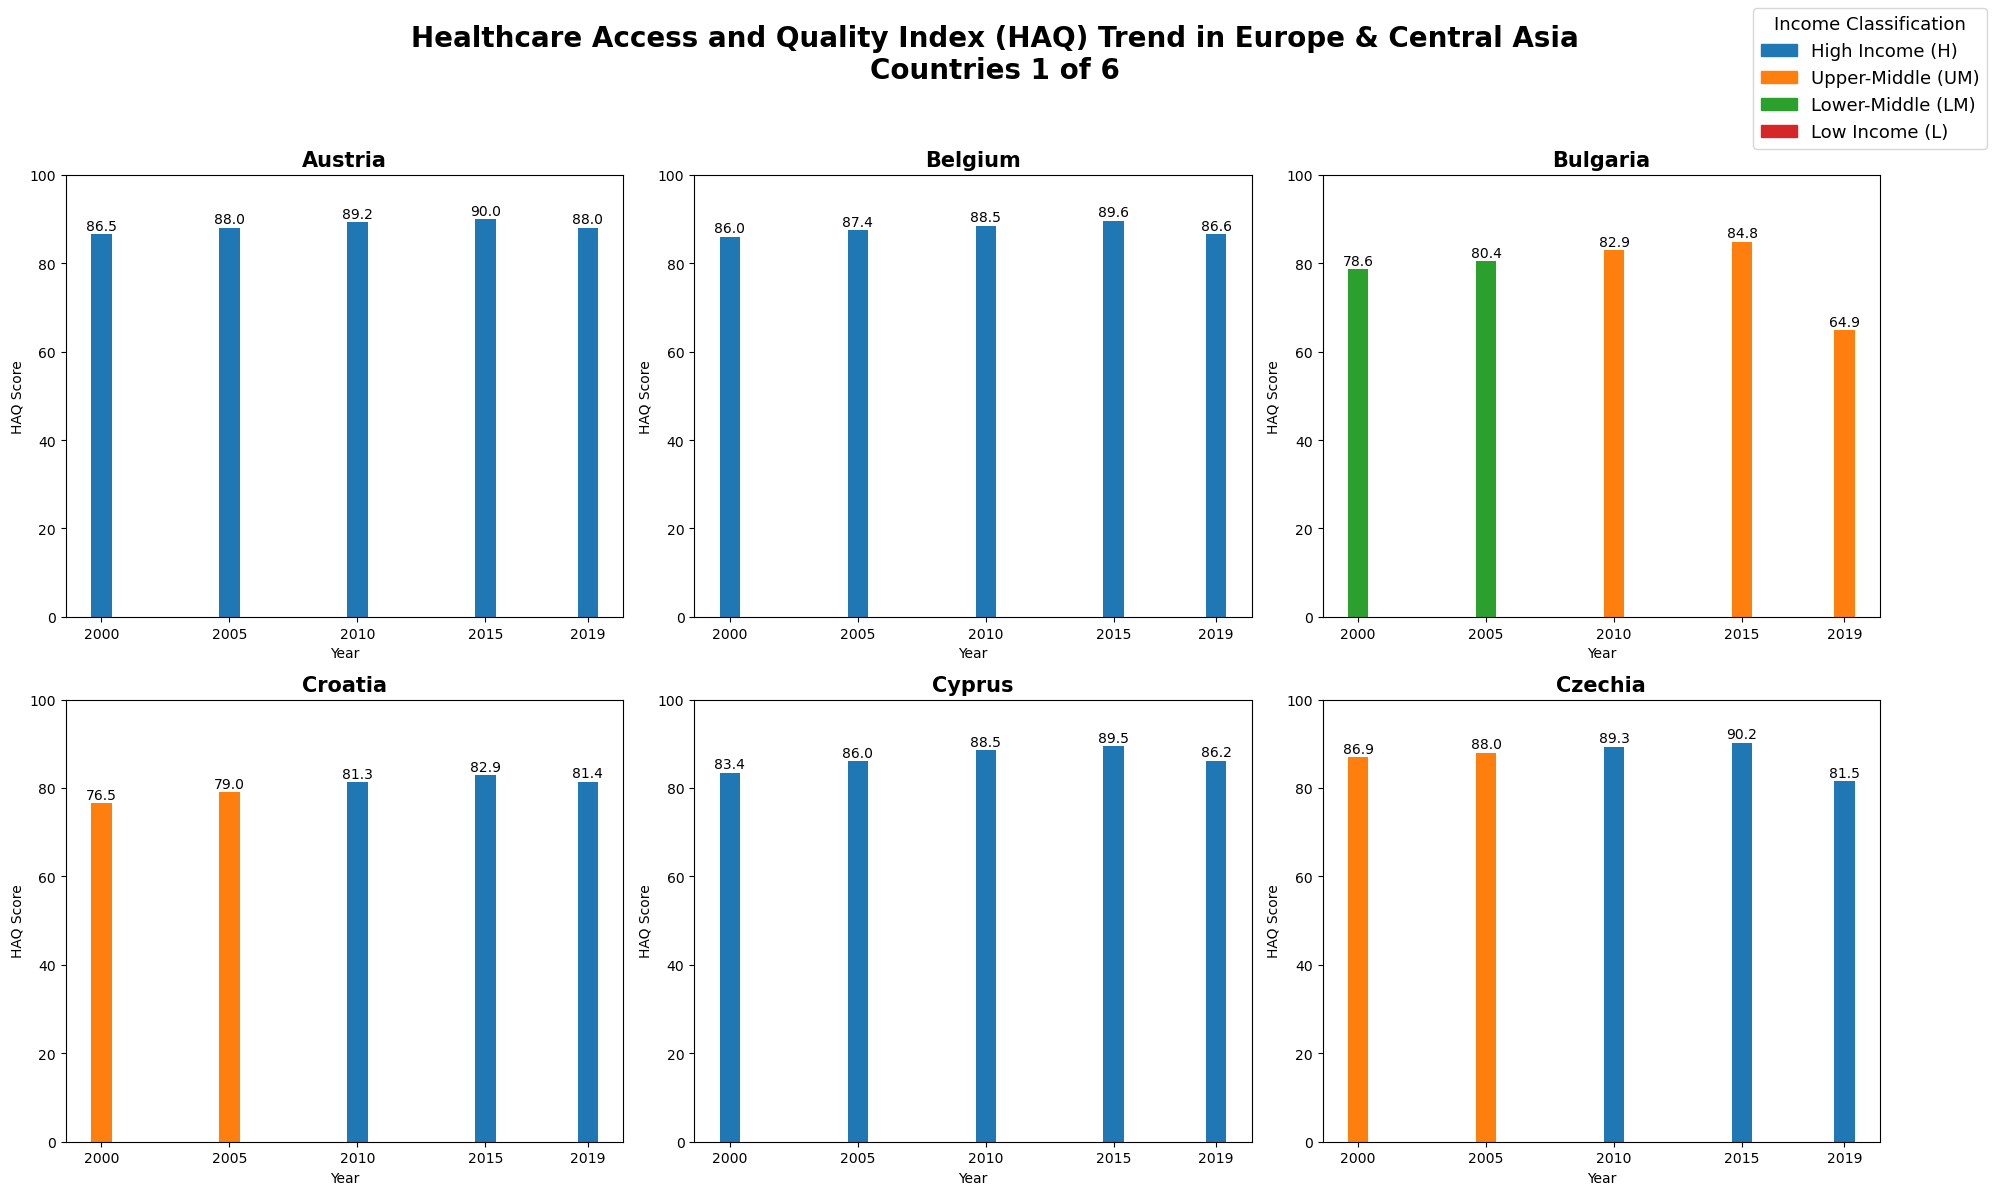

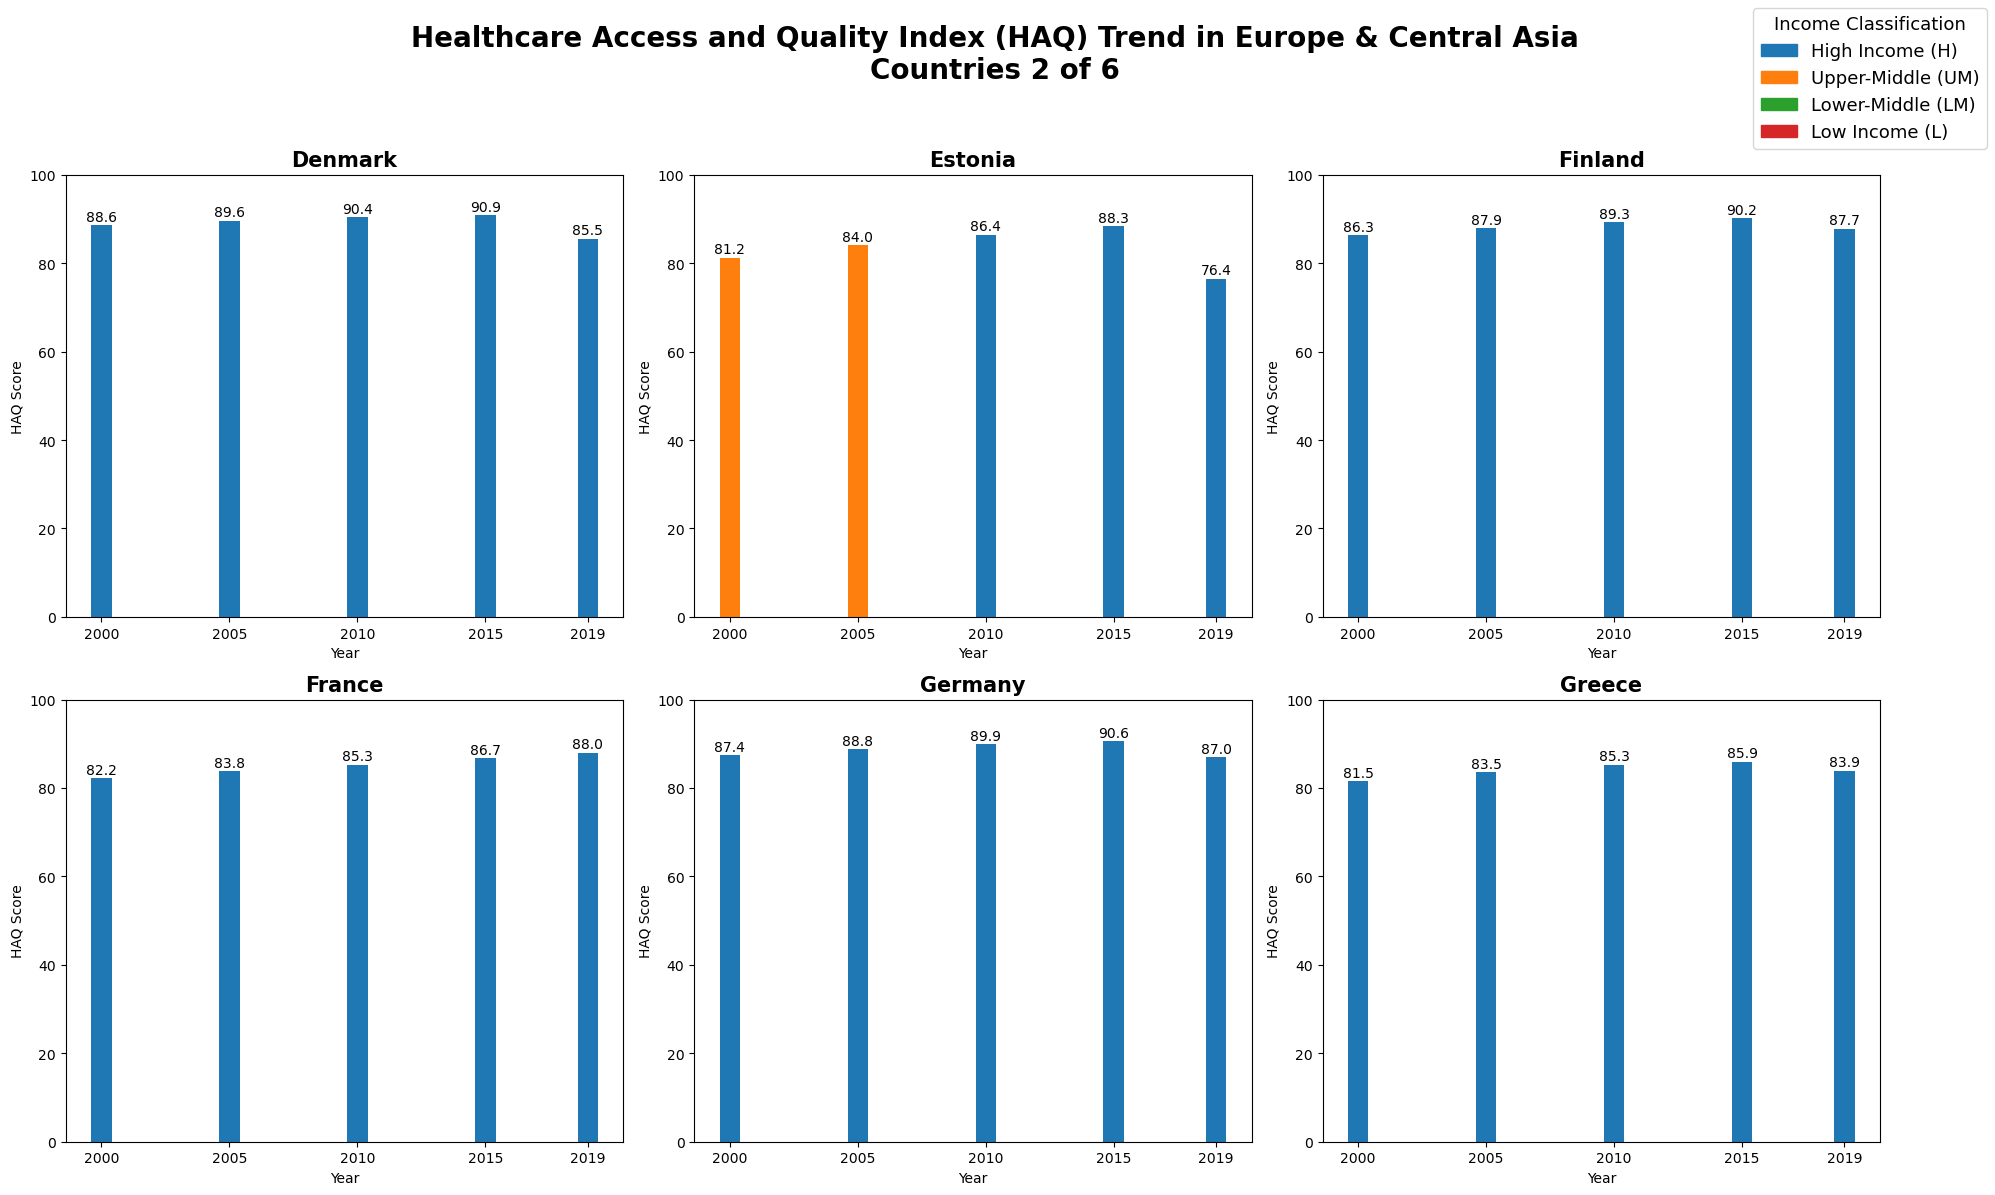

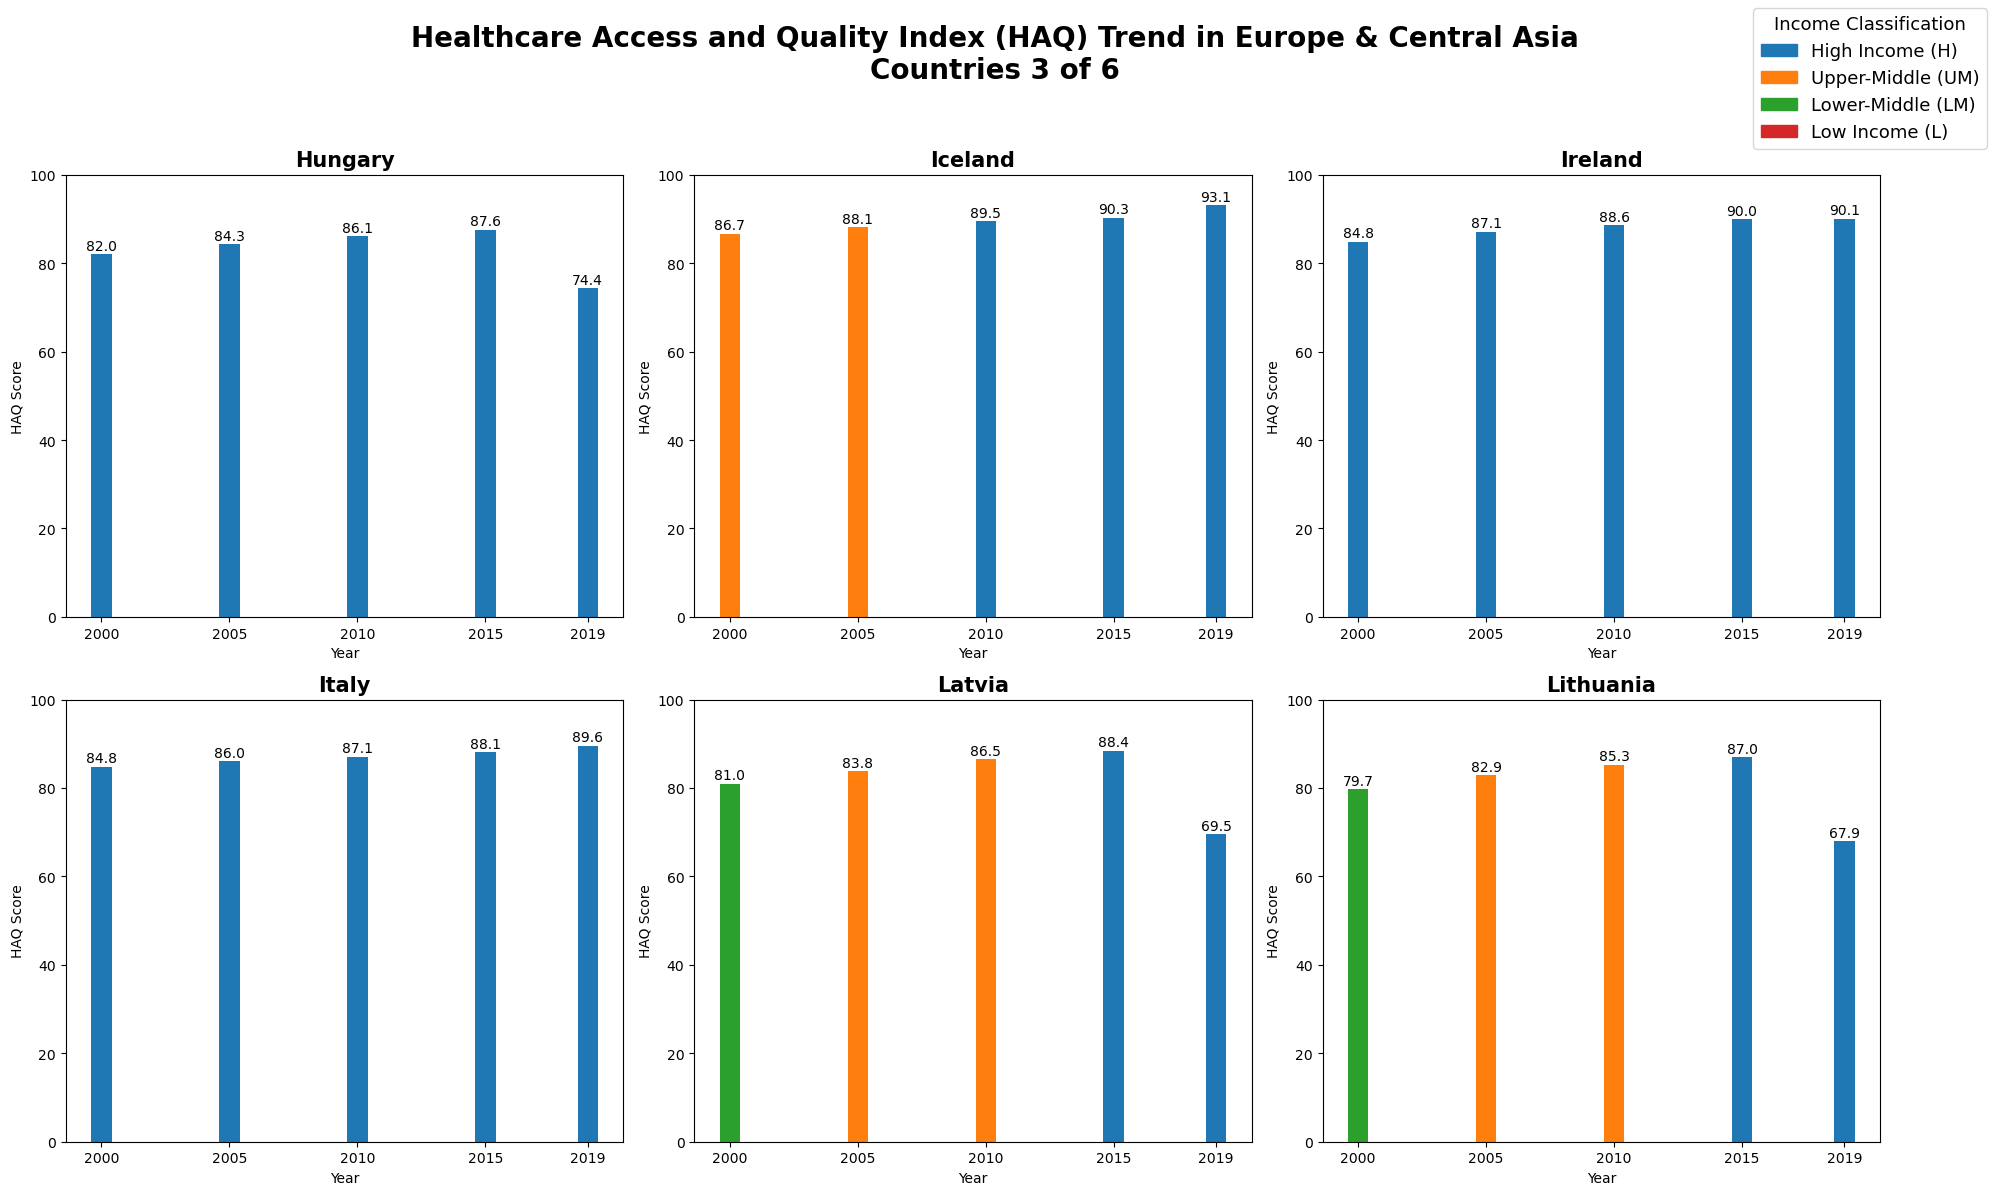

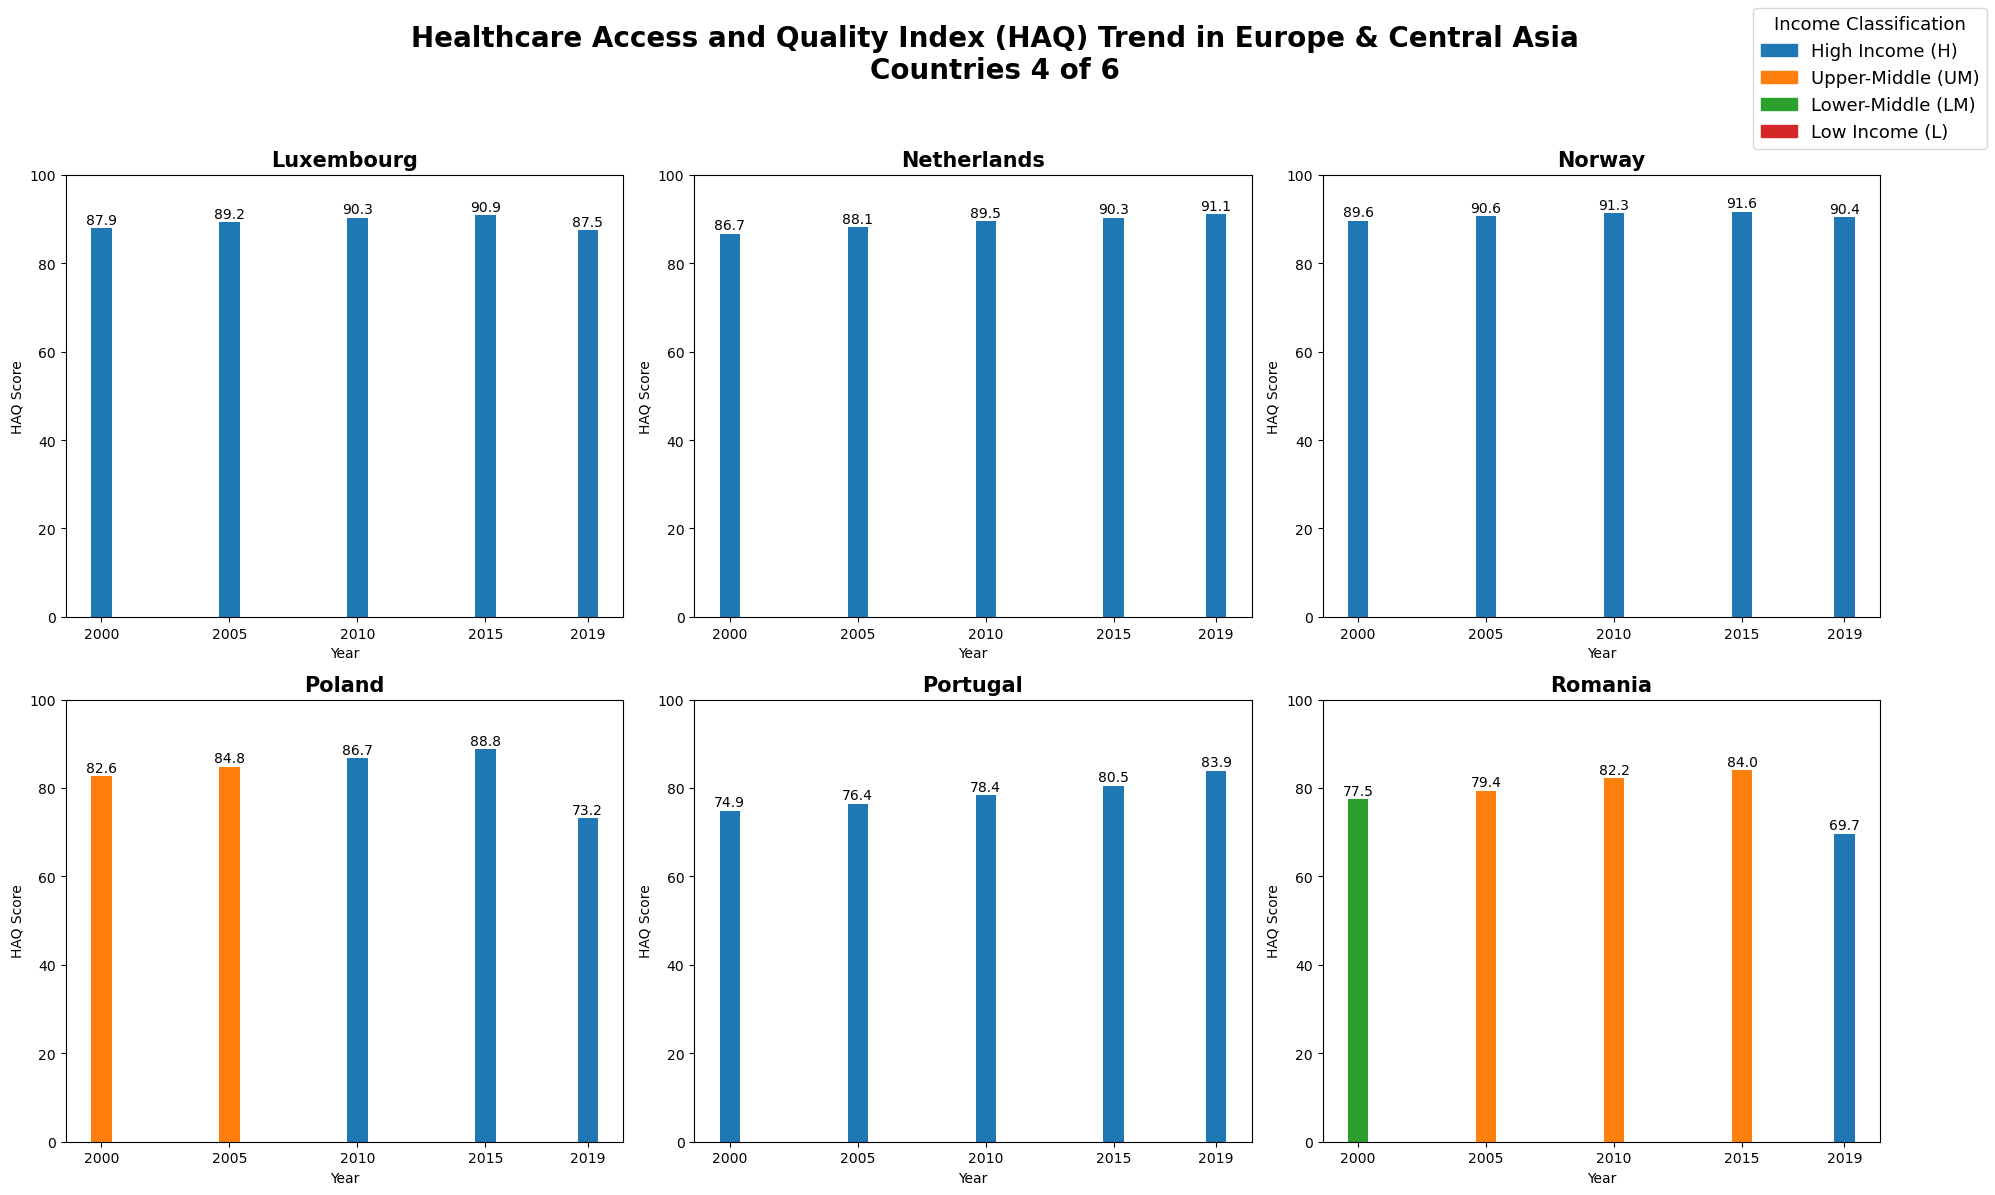

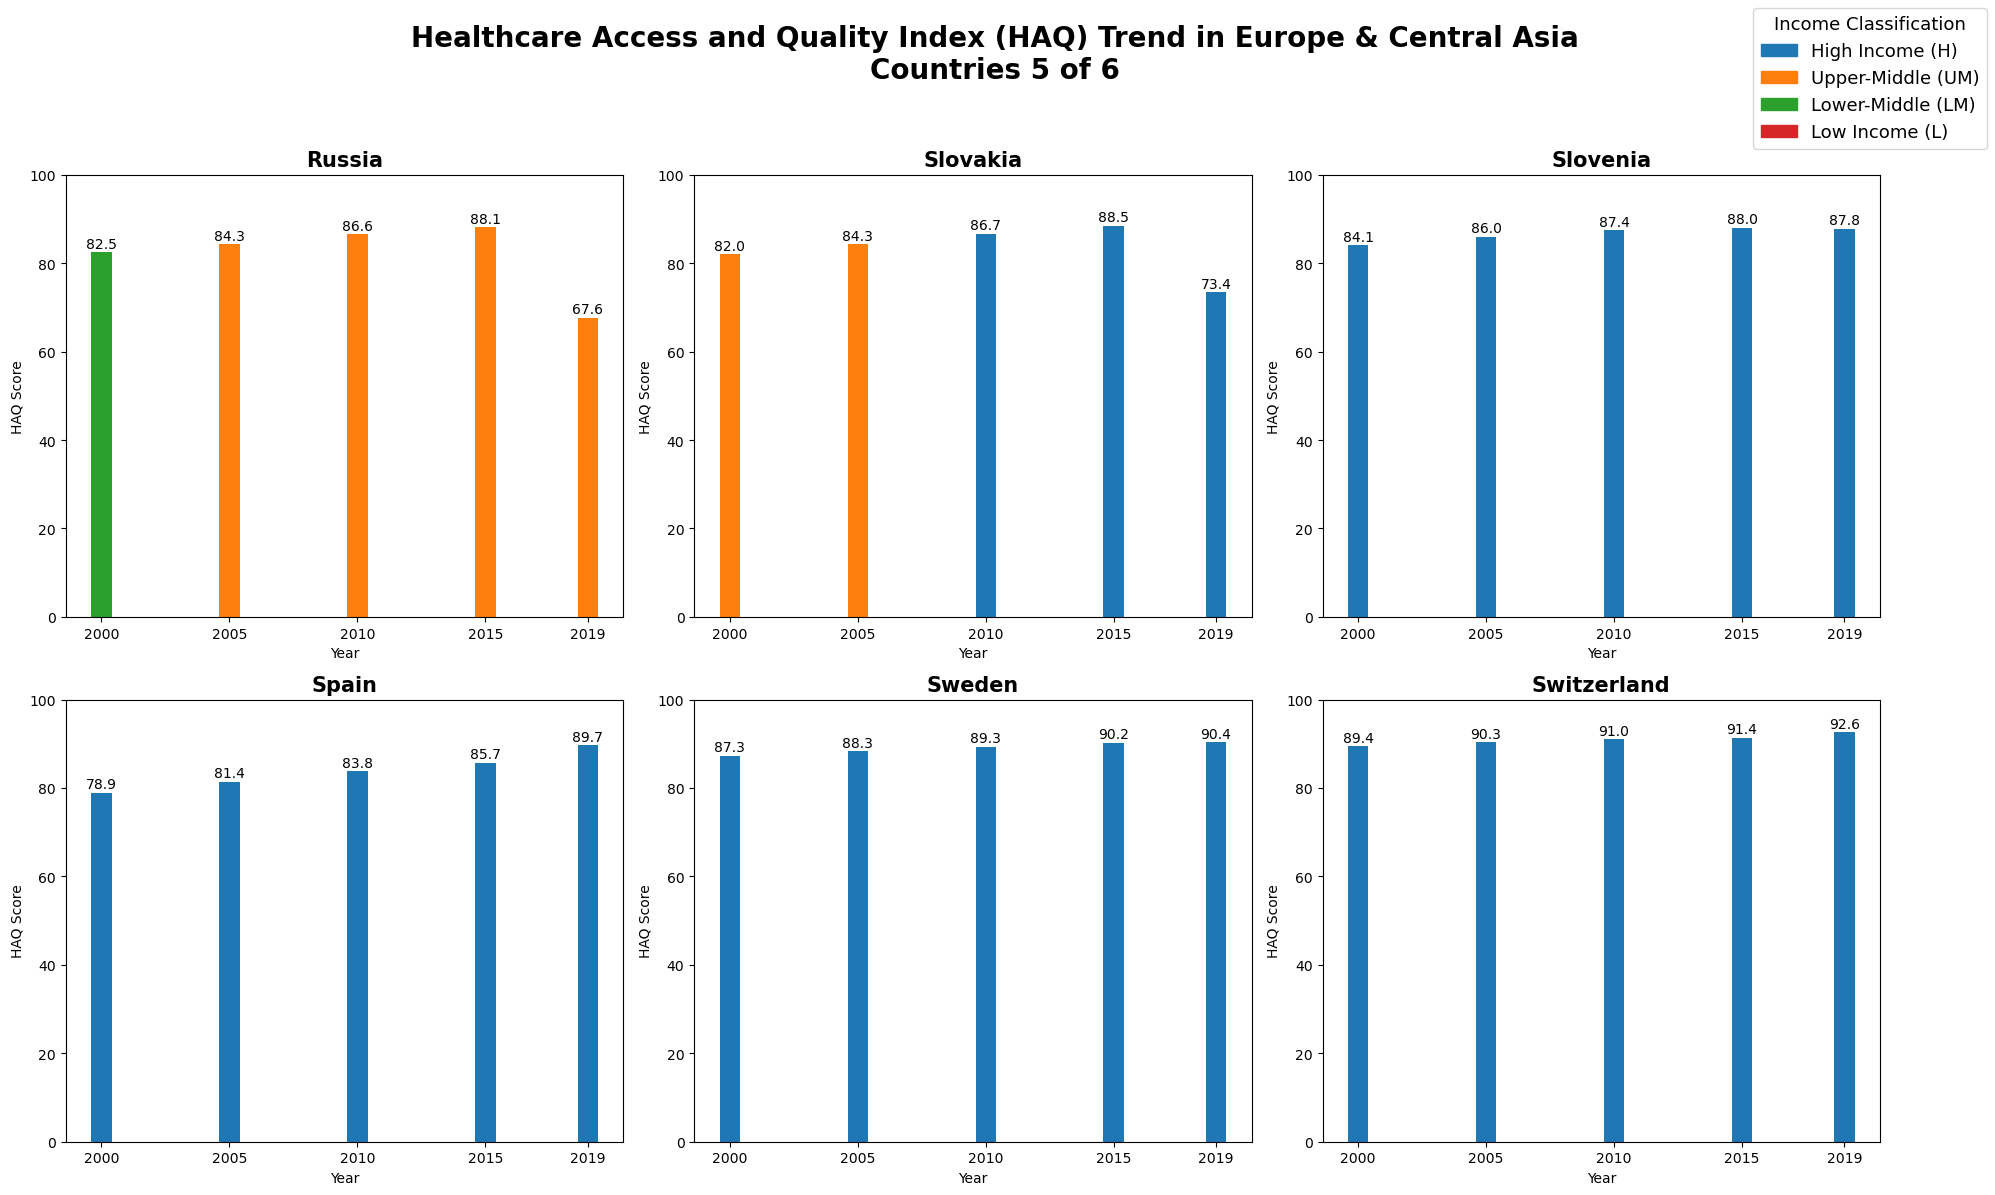

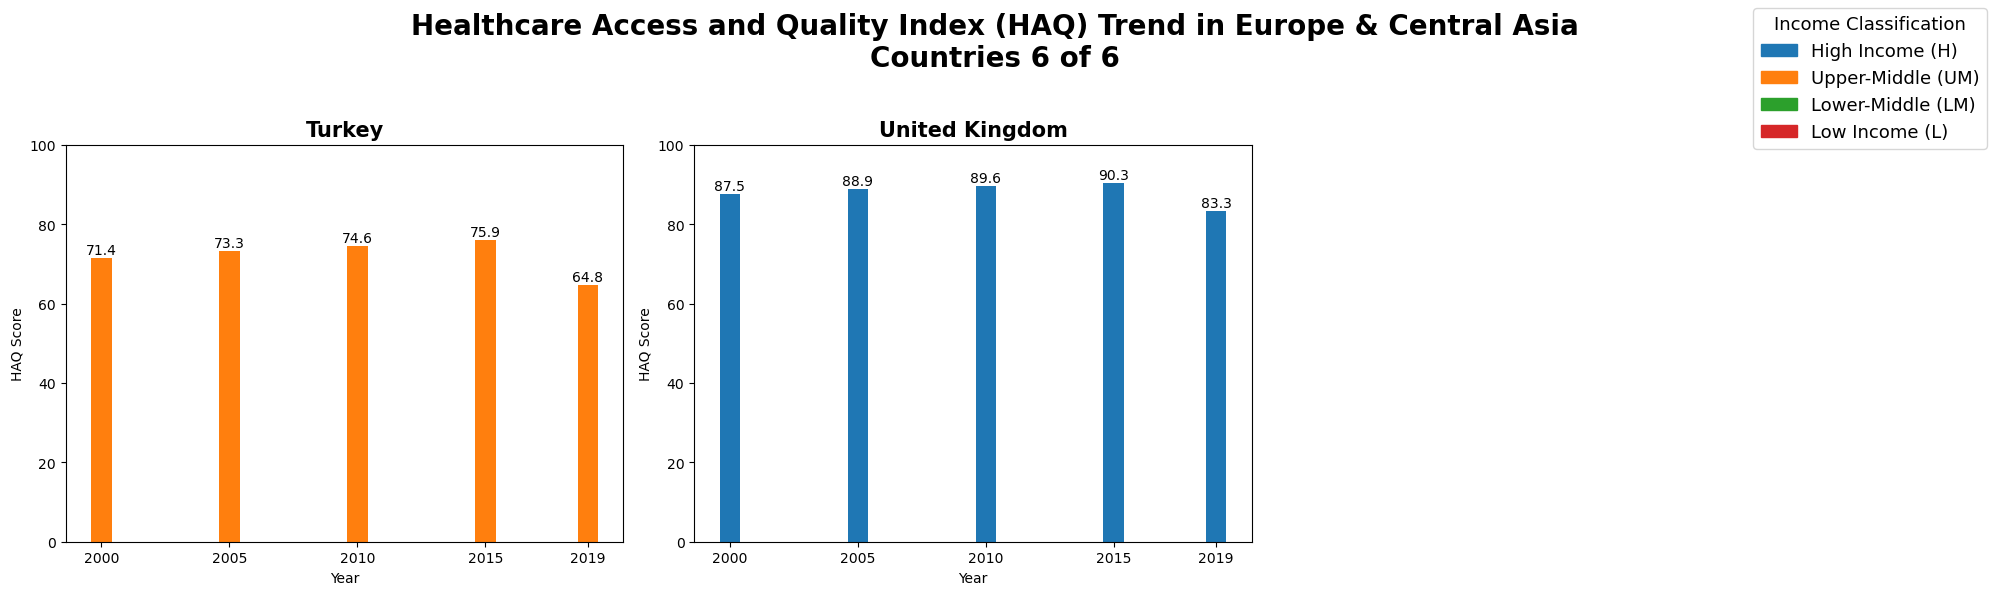

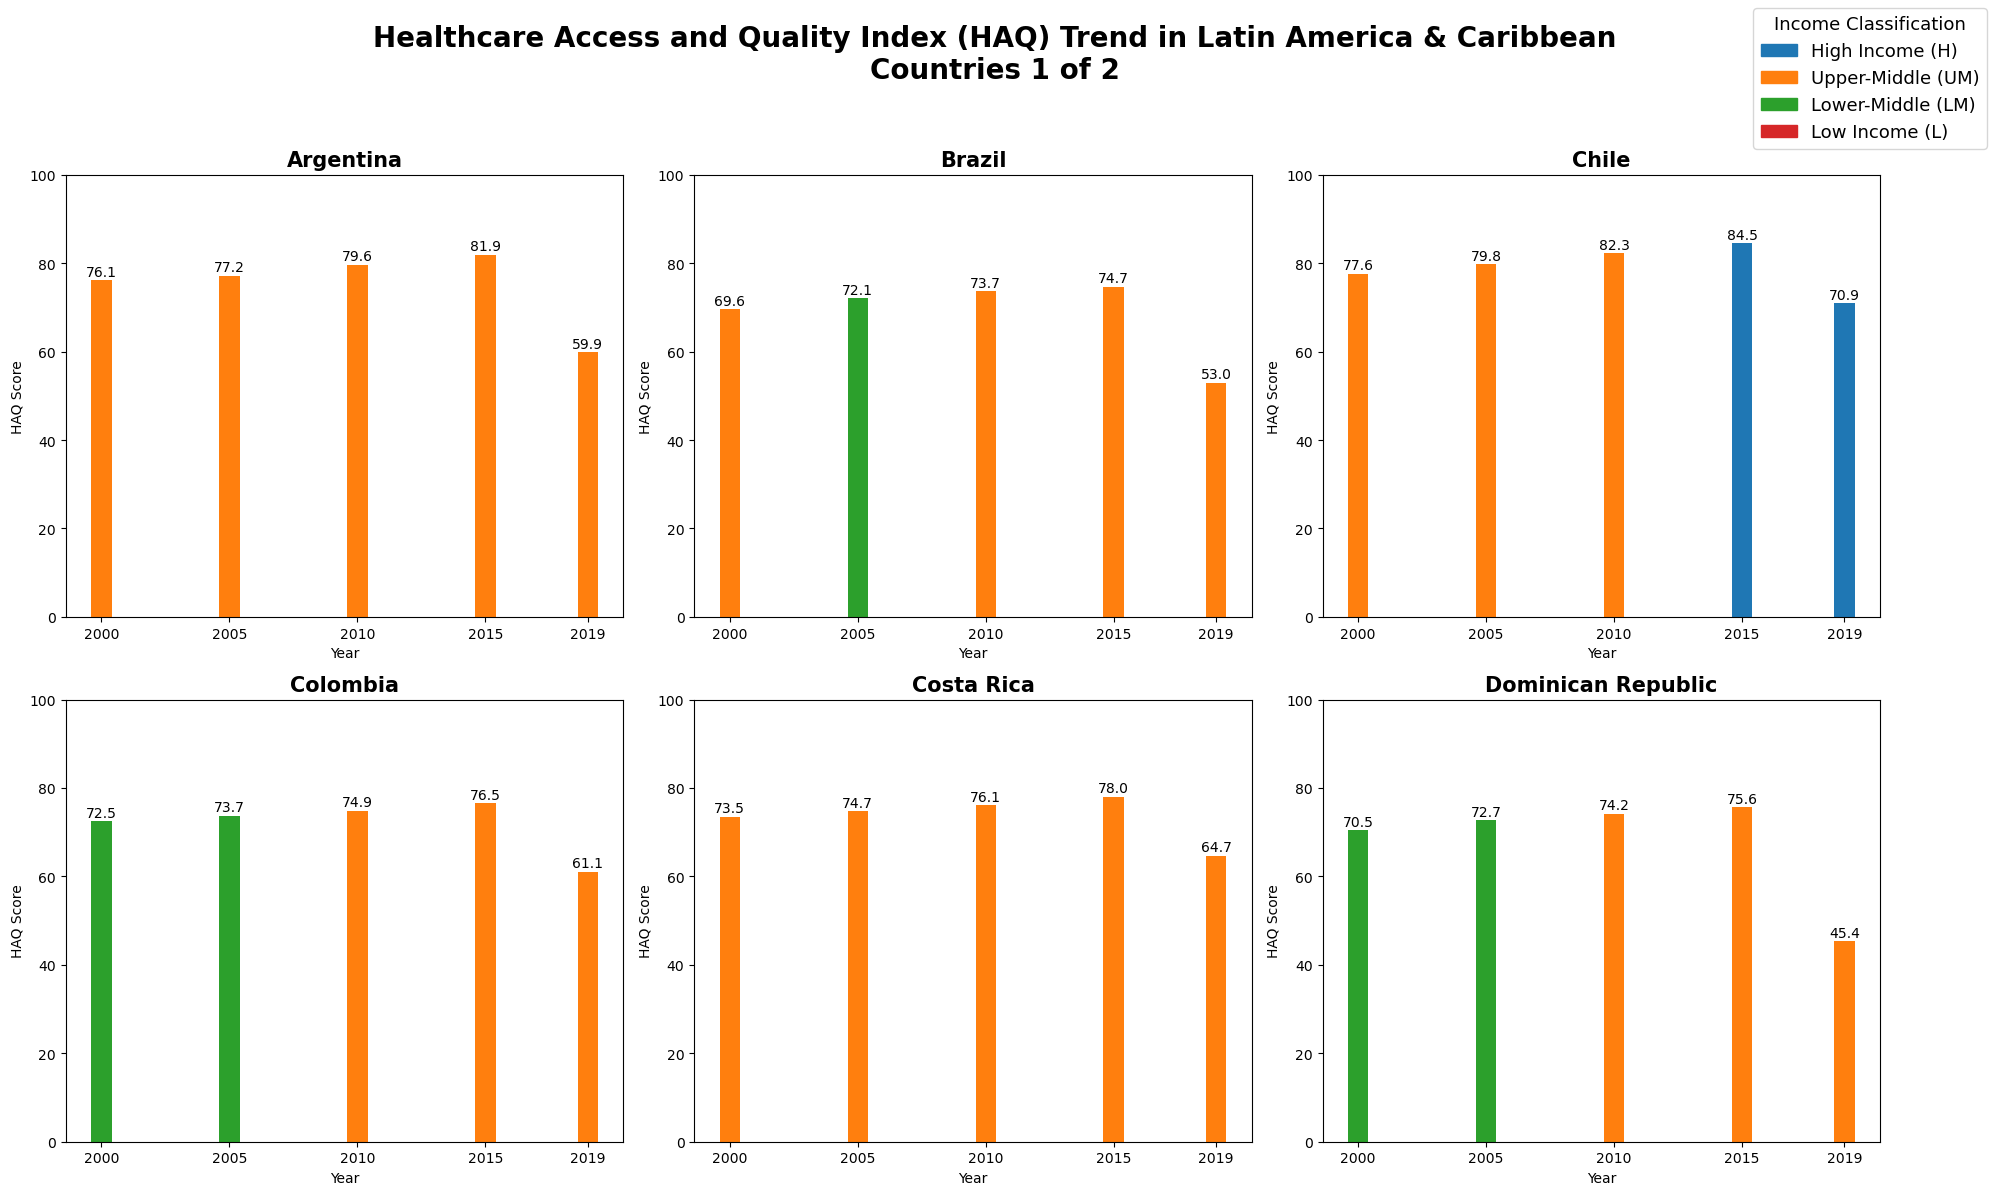

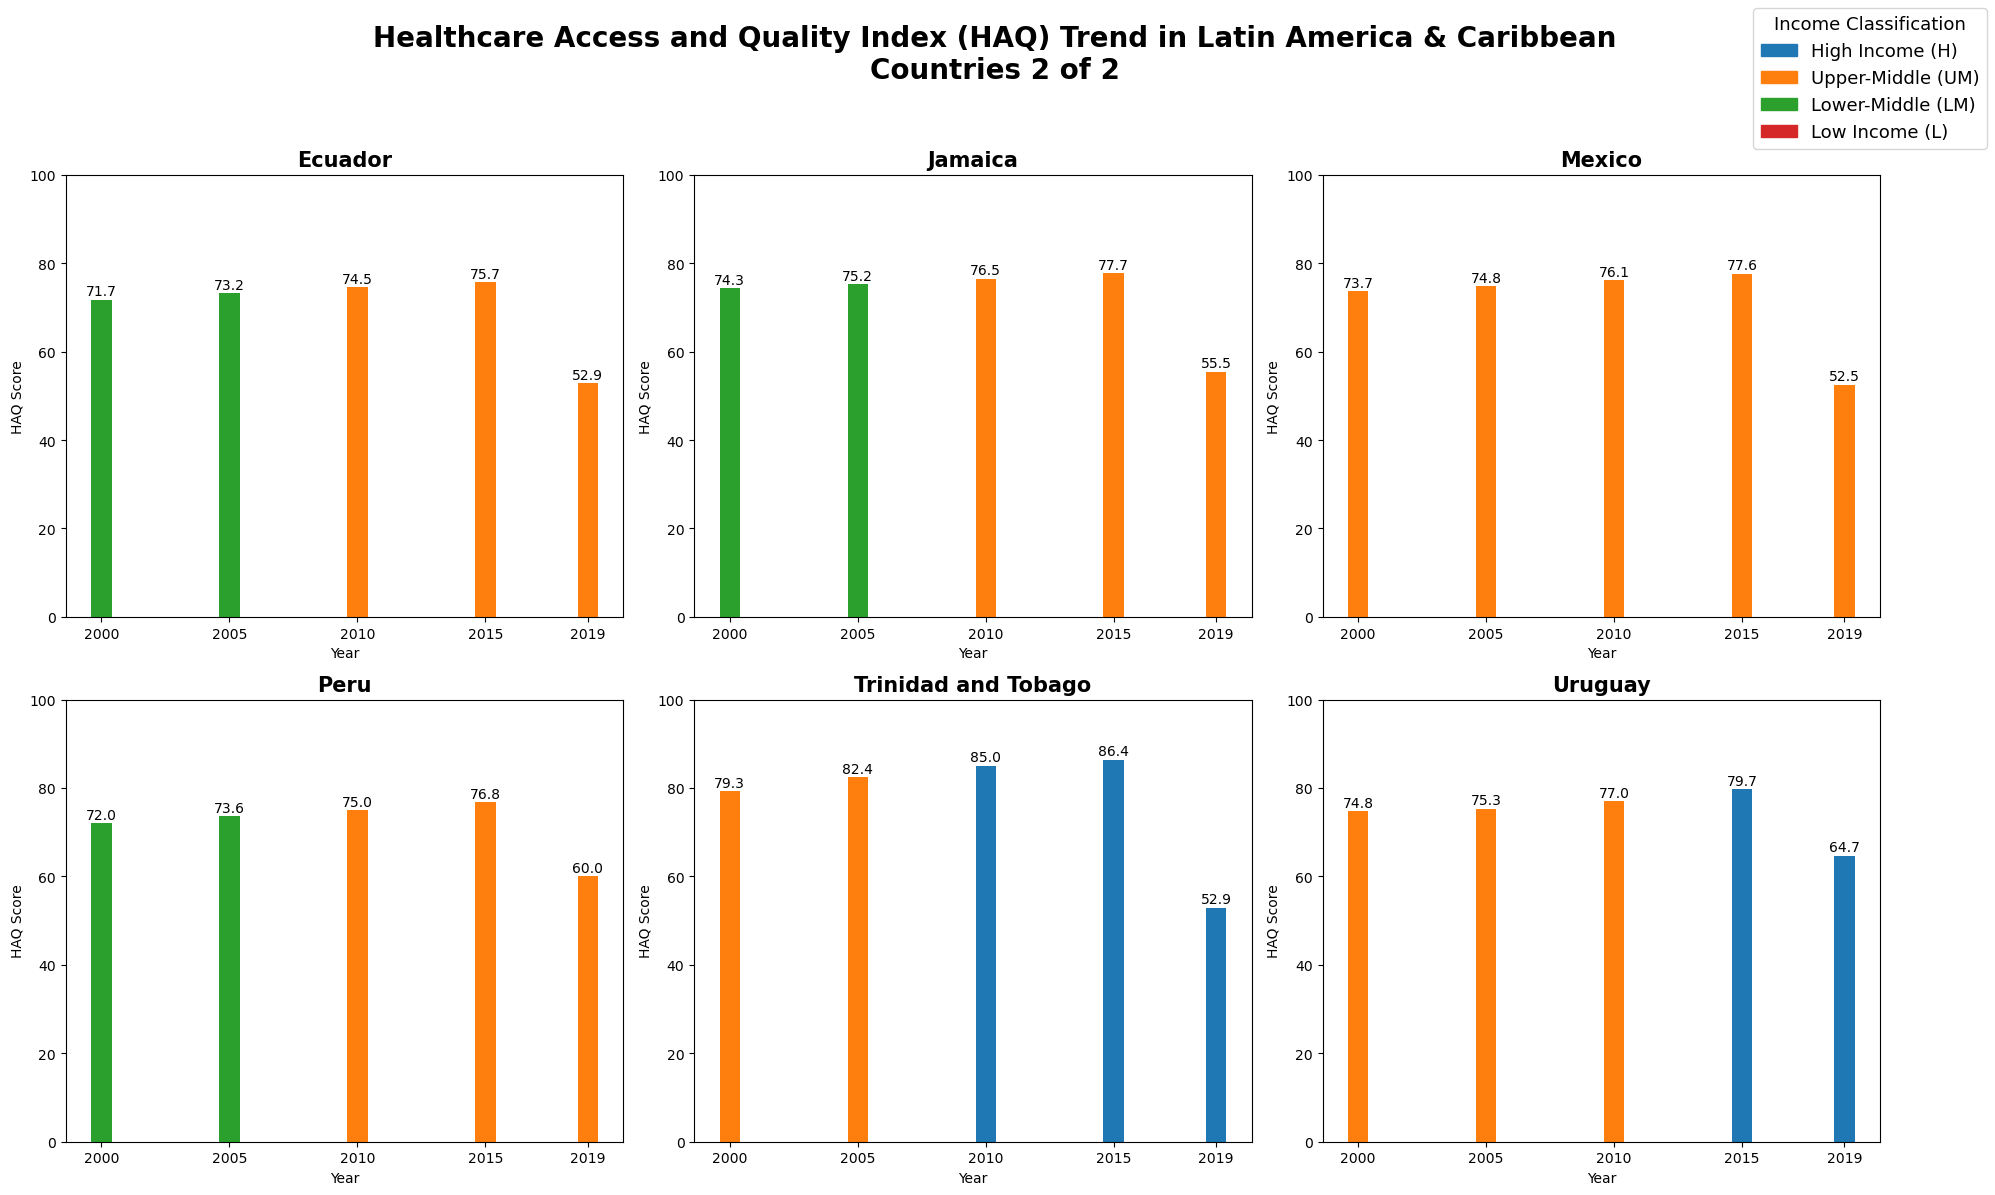

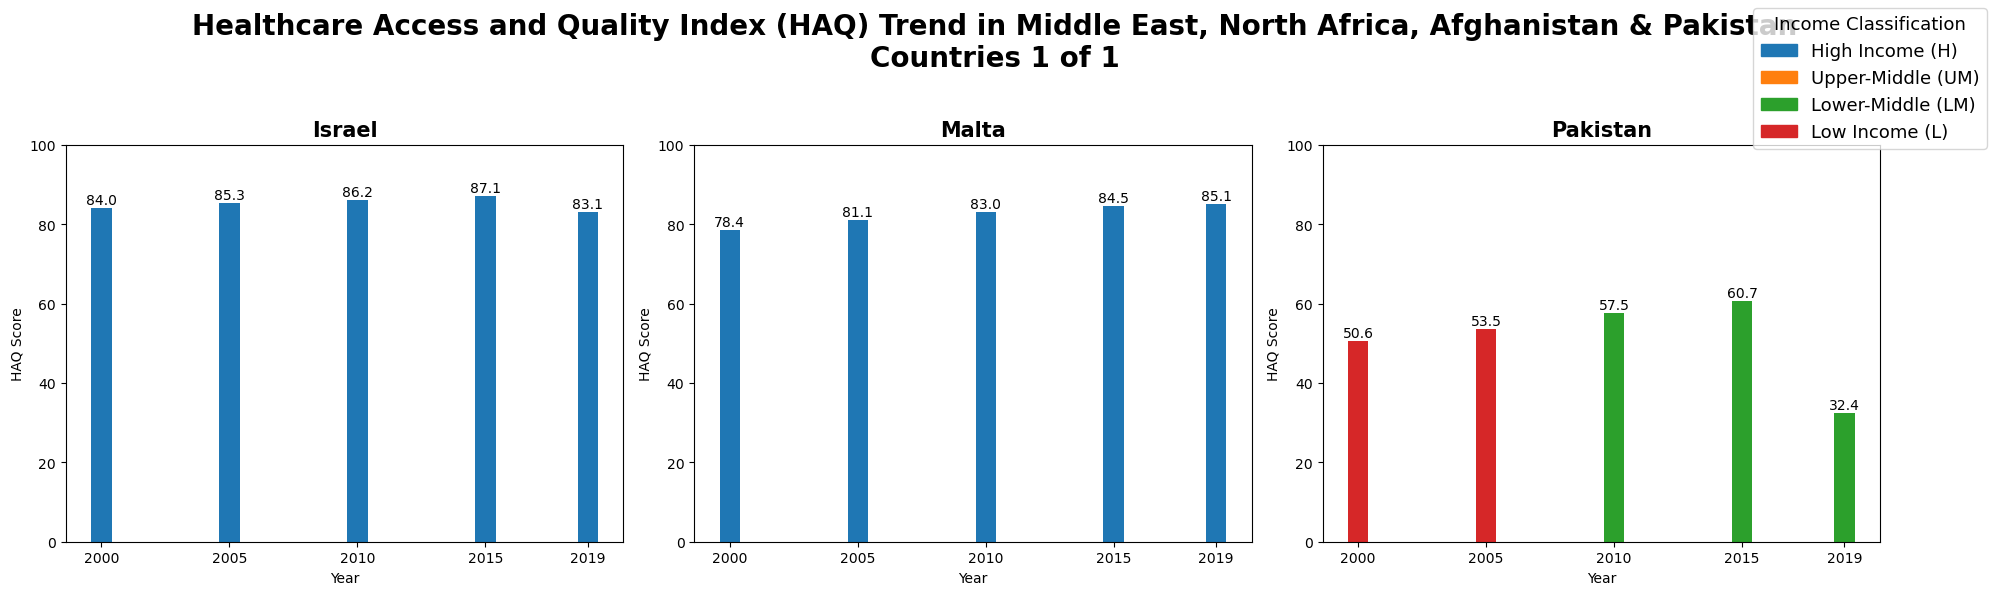

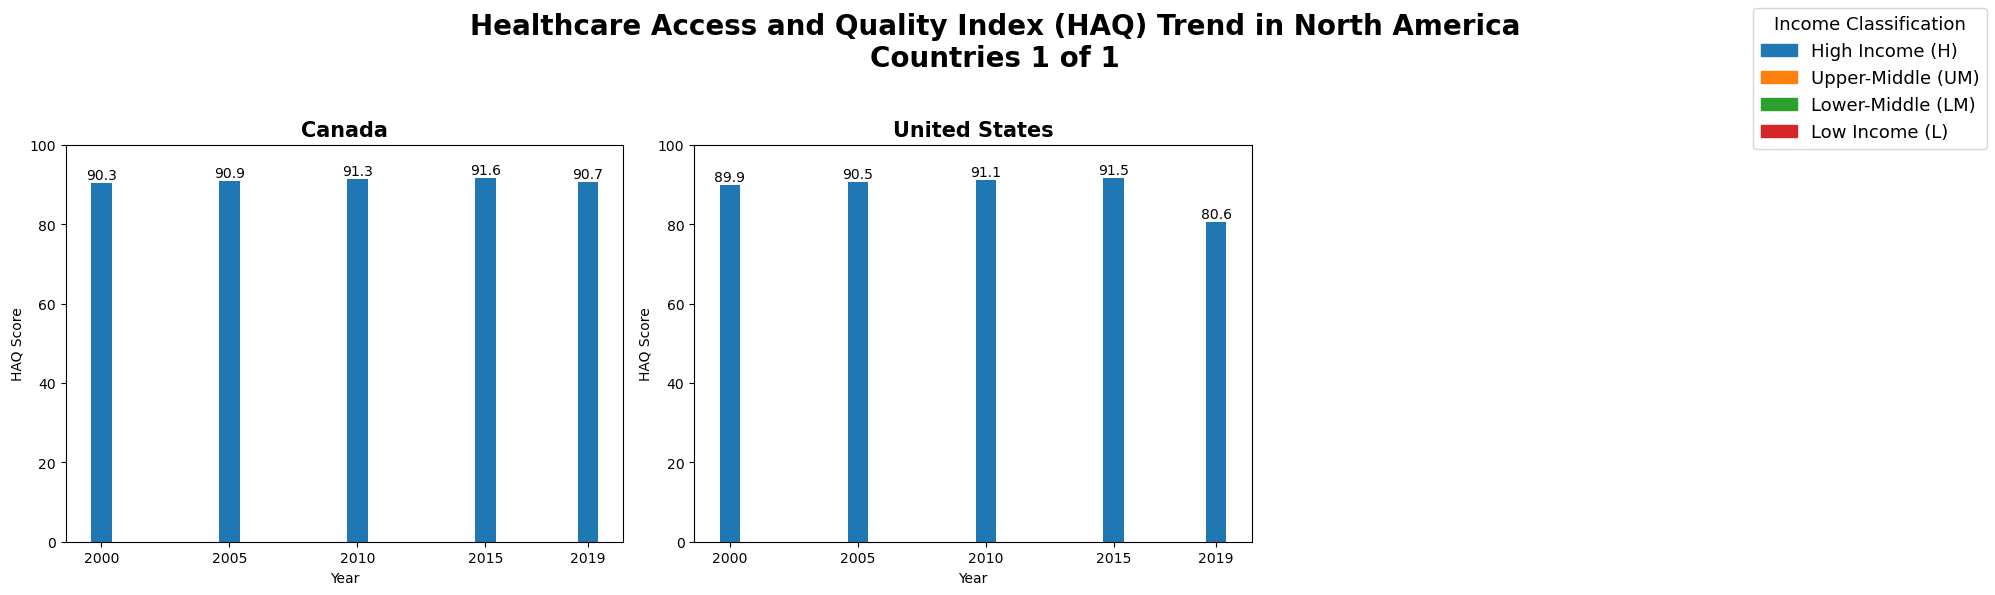

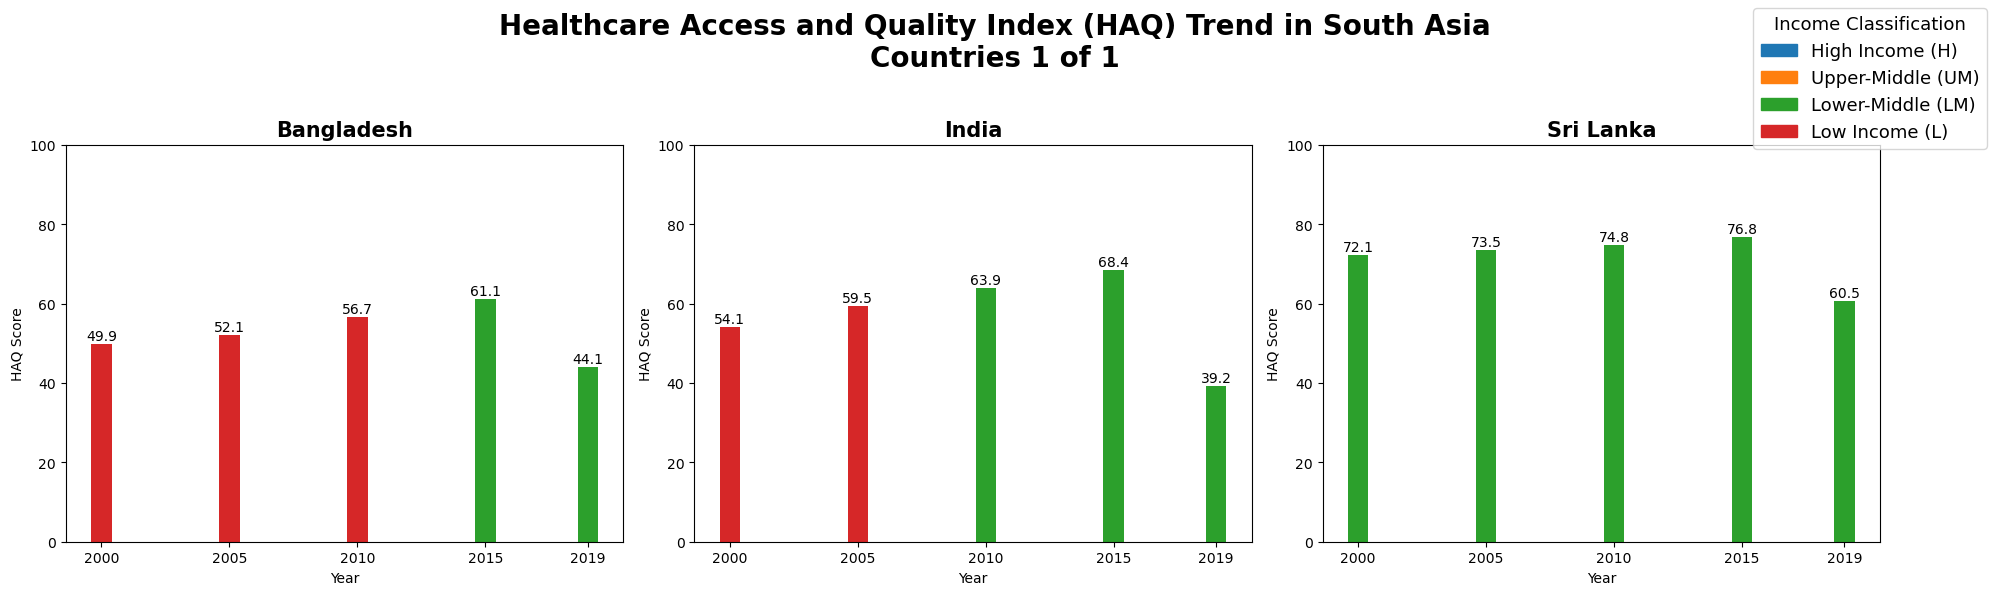

In [7]:
for region in regions:

    df_r = df[df[region_col] == region]
    countries = sorted(df_r[country_col].unique())

    # --- NEW: split list into chunks of 6 ---
    chunk_size = 6
    country_groups = [countries[i:i + chunk_size] for i in range(0, len(countries), chunk_size)]

    # --- LOOP THROUGH GROUPS OF 6 ---
    for group_idx, group in enumerate(country_groups, start=1):

        n_countries = len(group)
        cols = 3
        rows = math.ceil(n_countries / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
        axes = axes.flatten()

        fig.suptitle(
            f"Healthcare Access and Quality Index (HAQ) Trend in {region}\n"
            f"Countries {group_idx} of {len(country_groups)}",
            fontsize=20, weight='bold', y=0.98
        )

        # ----------------------------------------------------
        #  PLOT PER COUNTRY IN THIS GROUP OF 6
        # ----------------------------------------------------
        for i, country in enumerate(group):
            ax = axes[i]
            df_c = df_r[df_r[country_col] == country].sort_values(year_col)

            years = df_c[year_col]
            haq_values = df_c[haq_col]

            # Colors based on income class
            bar_colors = df_c[income_col].map(income_colors).fillna("gray")

            ax.bar(years, haq_values, color=bar_colors)

            for x, y in zip(years, haq_values):
                ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

            ax.set_title(country, fontsize=15, weight='bold')
            ax.set_ylim(0, 100)

            # Fixed ticks
            ax.set_xticks(year_ticks)
            ax.set_xticklabels(
                [str(y) if y in years.values else "" for y in year_ticks],
                fontsize=10
            )

            ax.set_xlabel("Year")
            ax.set_ylabel("HAQ Score")

        # ----------------------------------------------------
        #  Remove unused blank subplots
        # ----------------------------------------------------
        for j in range(i + 1, rows * cols):
            fig.delaxes(axes[j])

        # ----------------------------------------------------
        #  Shared Legend
        # ----------------------------------------------------
        handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
        labels = ["High Income (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low Income (L)"]

        fig.legend(
            handles, labels,
            title="Income Classification",
            loc="upper right", fontsize=13, title_fontsize=13
        )

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # --- SAVE FILE WITH GROUP NUMBER ---
        filename = f"box3region_income_{region.replace(' ', '_')}_part{group_idx}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        plt.show()


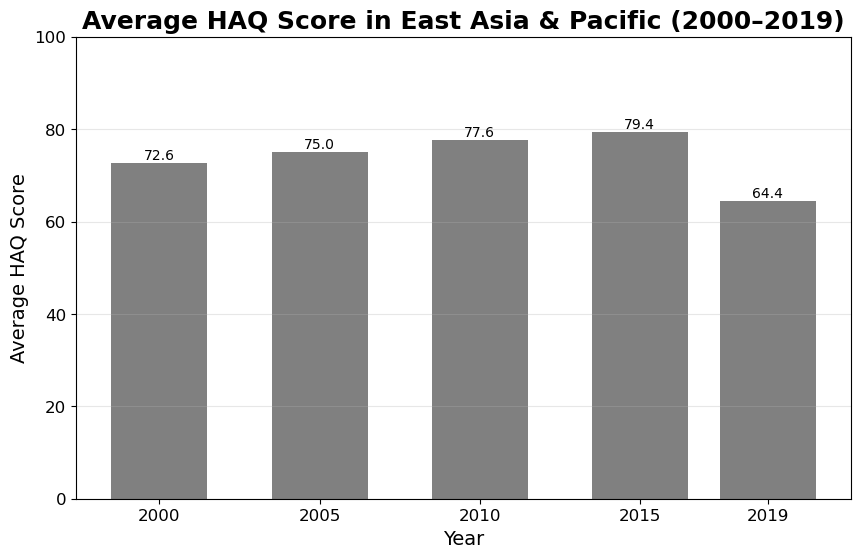

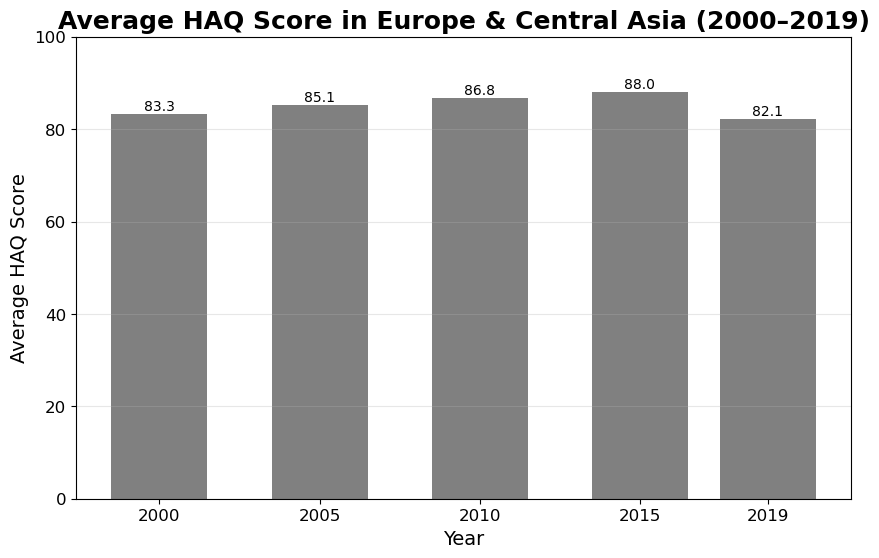

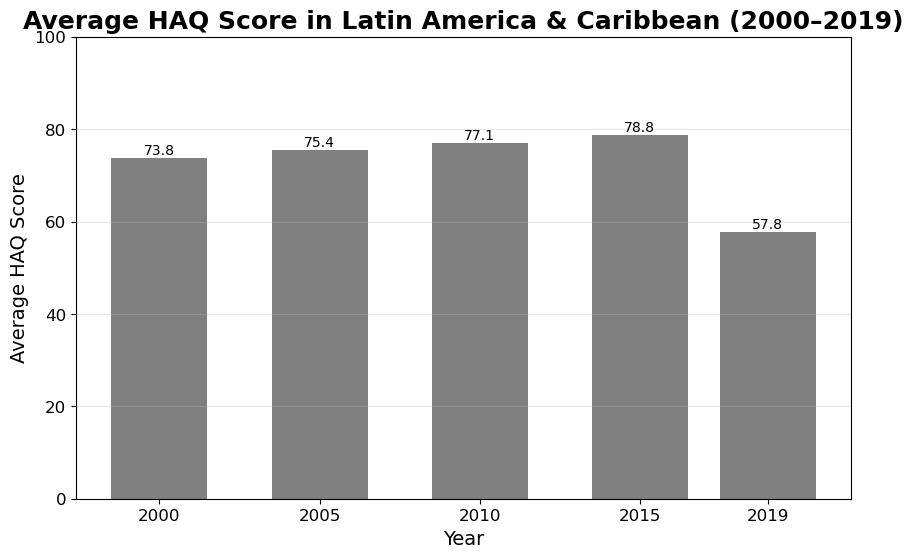

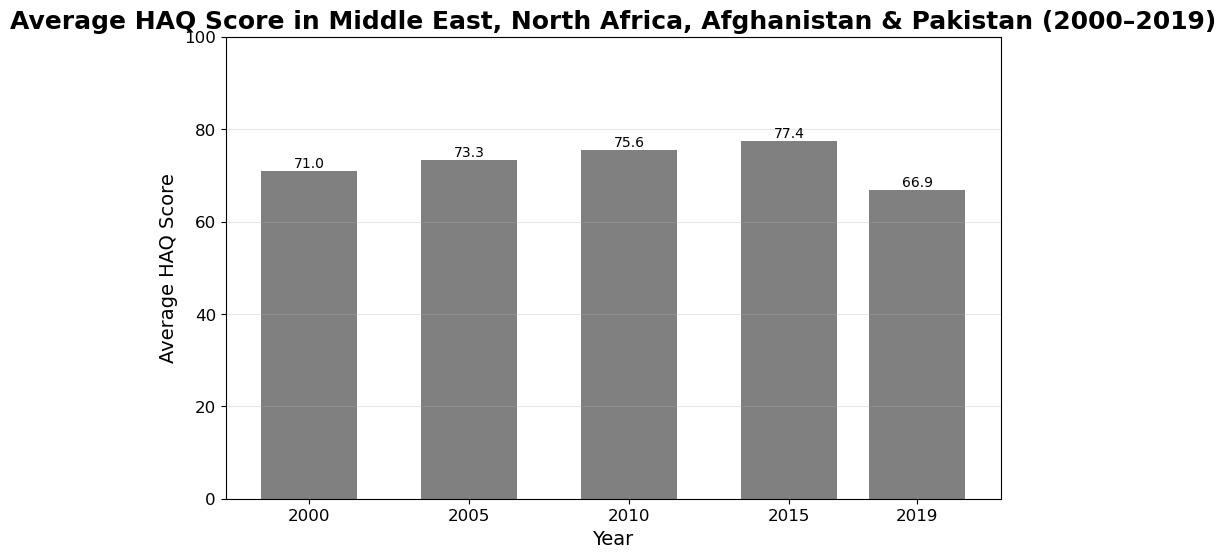

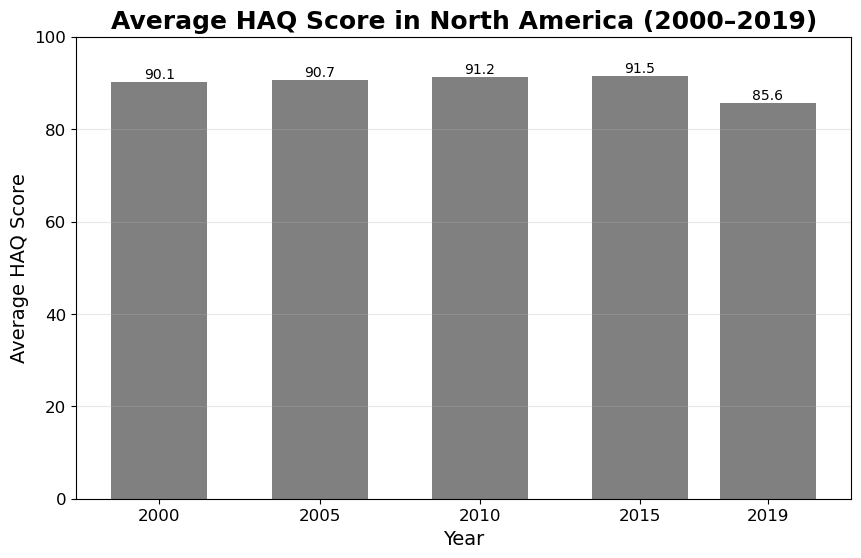

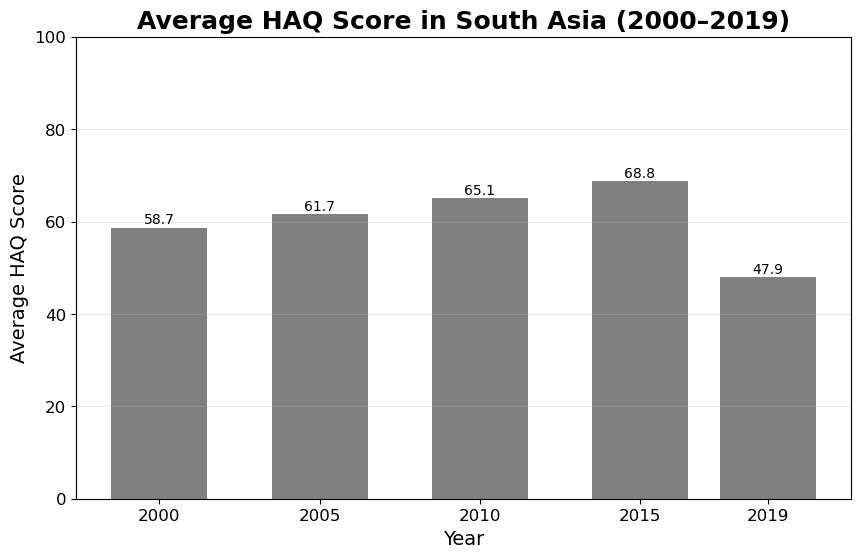

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Year is numeric
df[year_col] = df[year_col].astype(int)

# Fixed year ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Get regions
regions = sorted(df[region_col].dropna().unique())

# ----------------------------------------------------
#   AVERAGE HAQ PER REGION – BAR GRAPH
# ----------------------------------------------------
for region in regions:

    df_r = df[df[region_col] == region]

    # Compute mean HAQ per year
    df_avg = (
        df_r.groupby(year_col)[haq_col]
        .mean()
        .reindex(year_ticks)   # keep consistent year order
    )

    # ---- Create figure ----
    plt.figure(figsize=(10, 6))

    plt.bar(
        df_avg.index,
        df_avg.values,
        color="gray",
        width=3.0
    )

    # Label each bar
    for x, y in zip(df_avg.index, df_avg.values):
        if pd.notna(y):
            plt.text(x, y + 0.8, f"{y:.1f}", ha='center', fontsize=10)

    # Titles and labels
    plt.title(
        f"Average HAQ Score in {region} (2000–2019)",
        fontsize=18, weight='bold'
    )
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Average HAQ Score", fontsize=14)

    # X-axis ticks
    plt.xticks(year_ticks, fontsize=12)
    plt.yticks(fontsize=12)

    plt.ylim(0, 100)   # HAQ scale
    plt.grid(axis='y', alpha=0.3)

    # Save the figure
    filename = f"region_avg_HAQ_bar_{region.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.show()


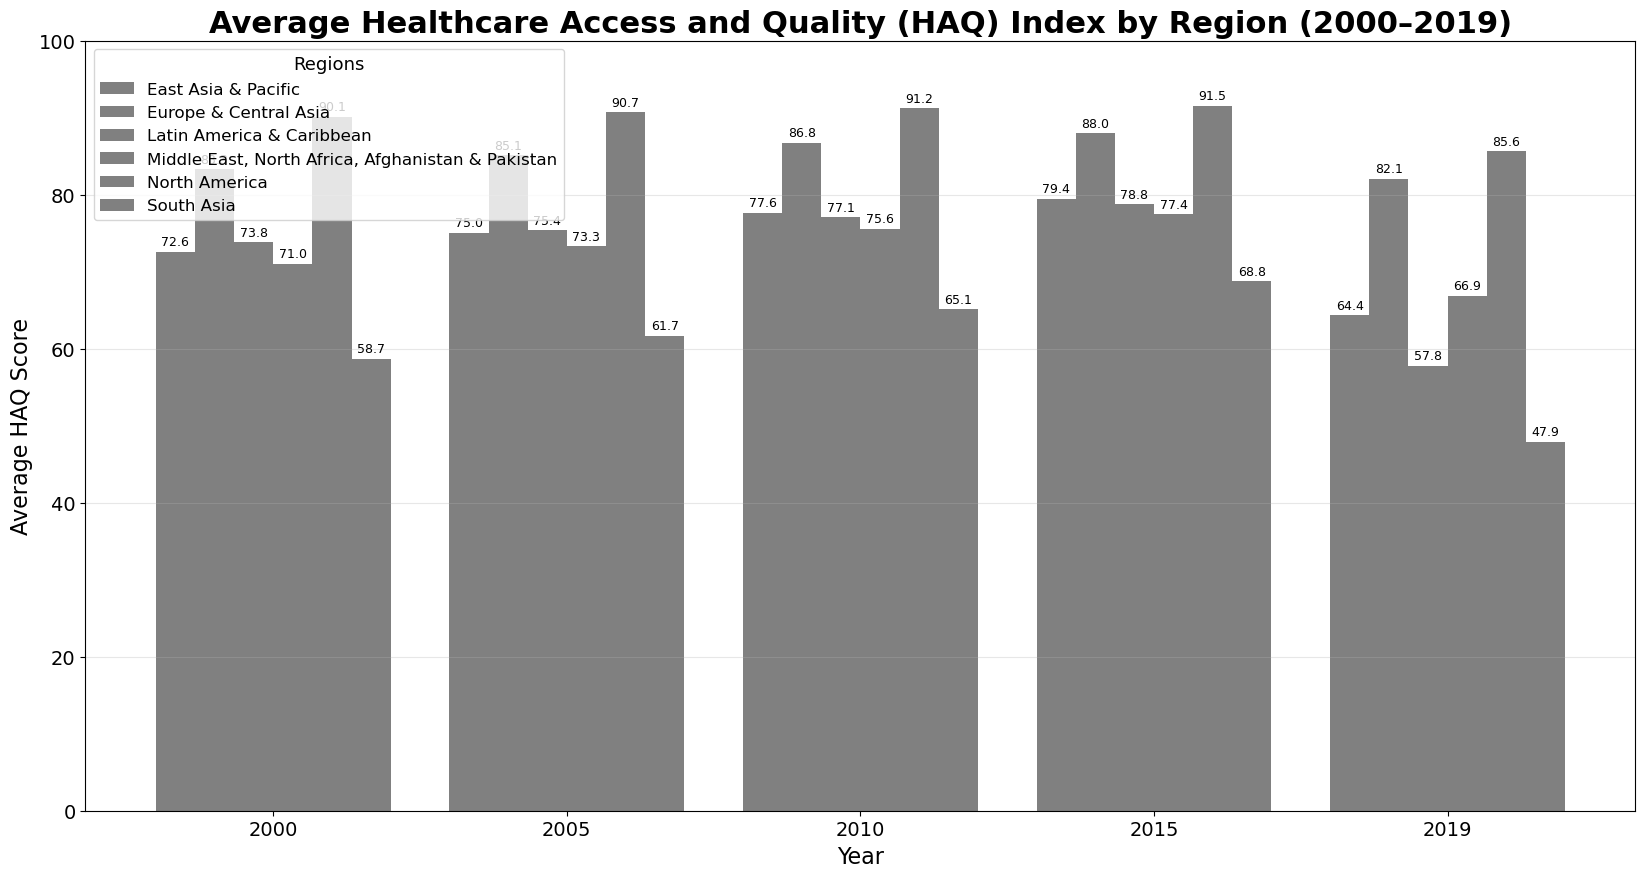

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure Year column is numeric
df[year_col] = df[year_col].astype(int)

# Fixed years
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Regions
regions = sorted(df[region_col].dropna().unique())

# Compute average HAQ per region per year
data = (
    df.groupby([region_col, year_col])[haq_col]
    .mean()
    .unstack(fill_value=np.nan)
    .reindex(regions)
    .reindex(columns=year_ticks)
)

# ----------------------------------------------------
#   CREATE ONE GROUPED BAR CHART
# ----------------------------------------------------
plt.figure(figsize=(20, 10))

x = np.arange(len(year_ticks))       # X positions for years
width = 0.8 / len(regions)           # dynamic bar width

# Plot each region as a bar subgroup
for i, region in enumerate(regions):
    values = data.loc[region].values

    bars = plt.bar(
        x + i * width,
        values,
        width=width,
        label=region,
        color="gray"
    )

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            plt.text(
                bar.get_x() + bar.get_width()/2,
                height + 0.8,
                f"{height:.1f}",
                ha='center',
                fontsize=9
            )

# Title & labels
plt.title(
    "Average Healthcare Access and Quality (HAQ) Index by Region (2000–2019)",
    fontsize=22, weight='bold'
)
plt.ylabel("Average HAQ Score", fontsize=16)
plt.xlabel("Year", fontsize=16)

# X-axis ticks (centered)
plt.xticks(
    x + (len(regions)-1)*width/2,
    year_ticks,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Legend (regions)
plt.legend(title="Regions", fontsize=12, title_fontsize=13)

# Save
plt.savefig("ALL_regions_avg_HAQ_grouped_bar.png", dpi=300, bbox_inches="tight")

plt.show()


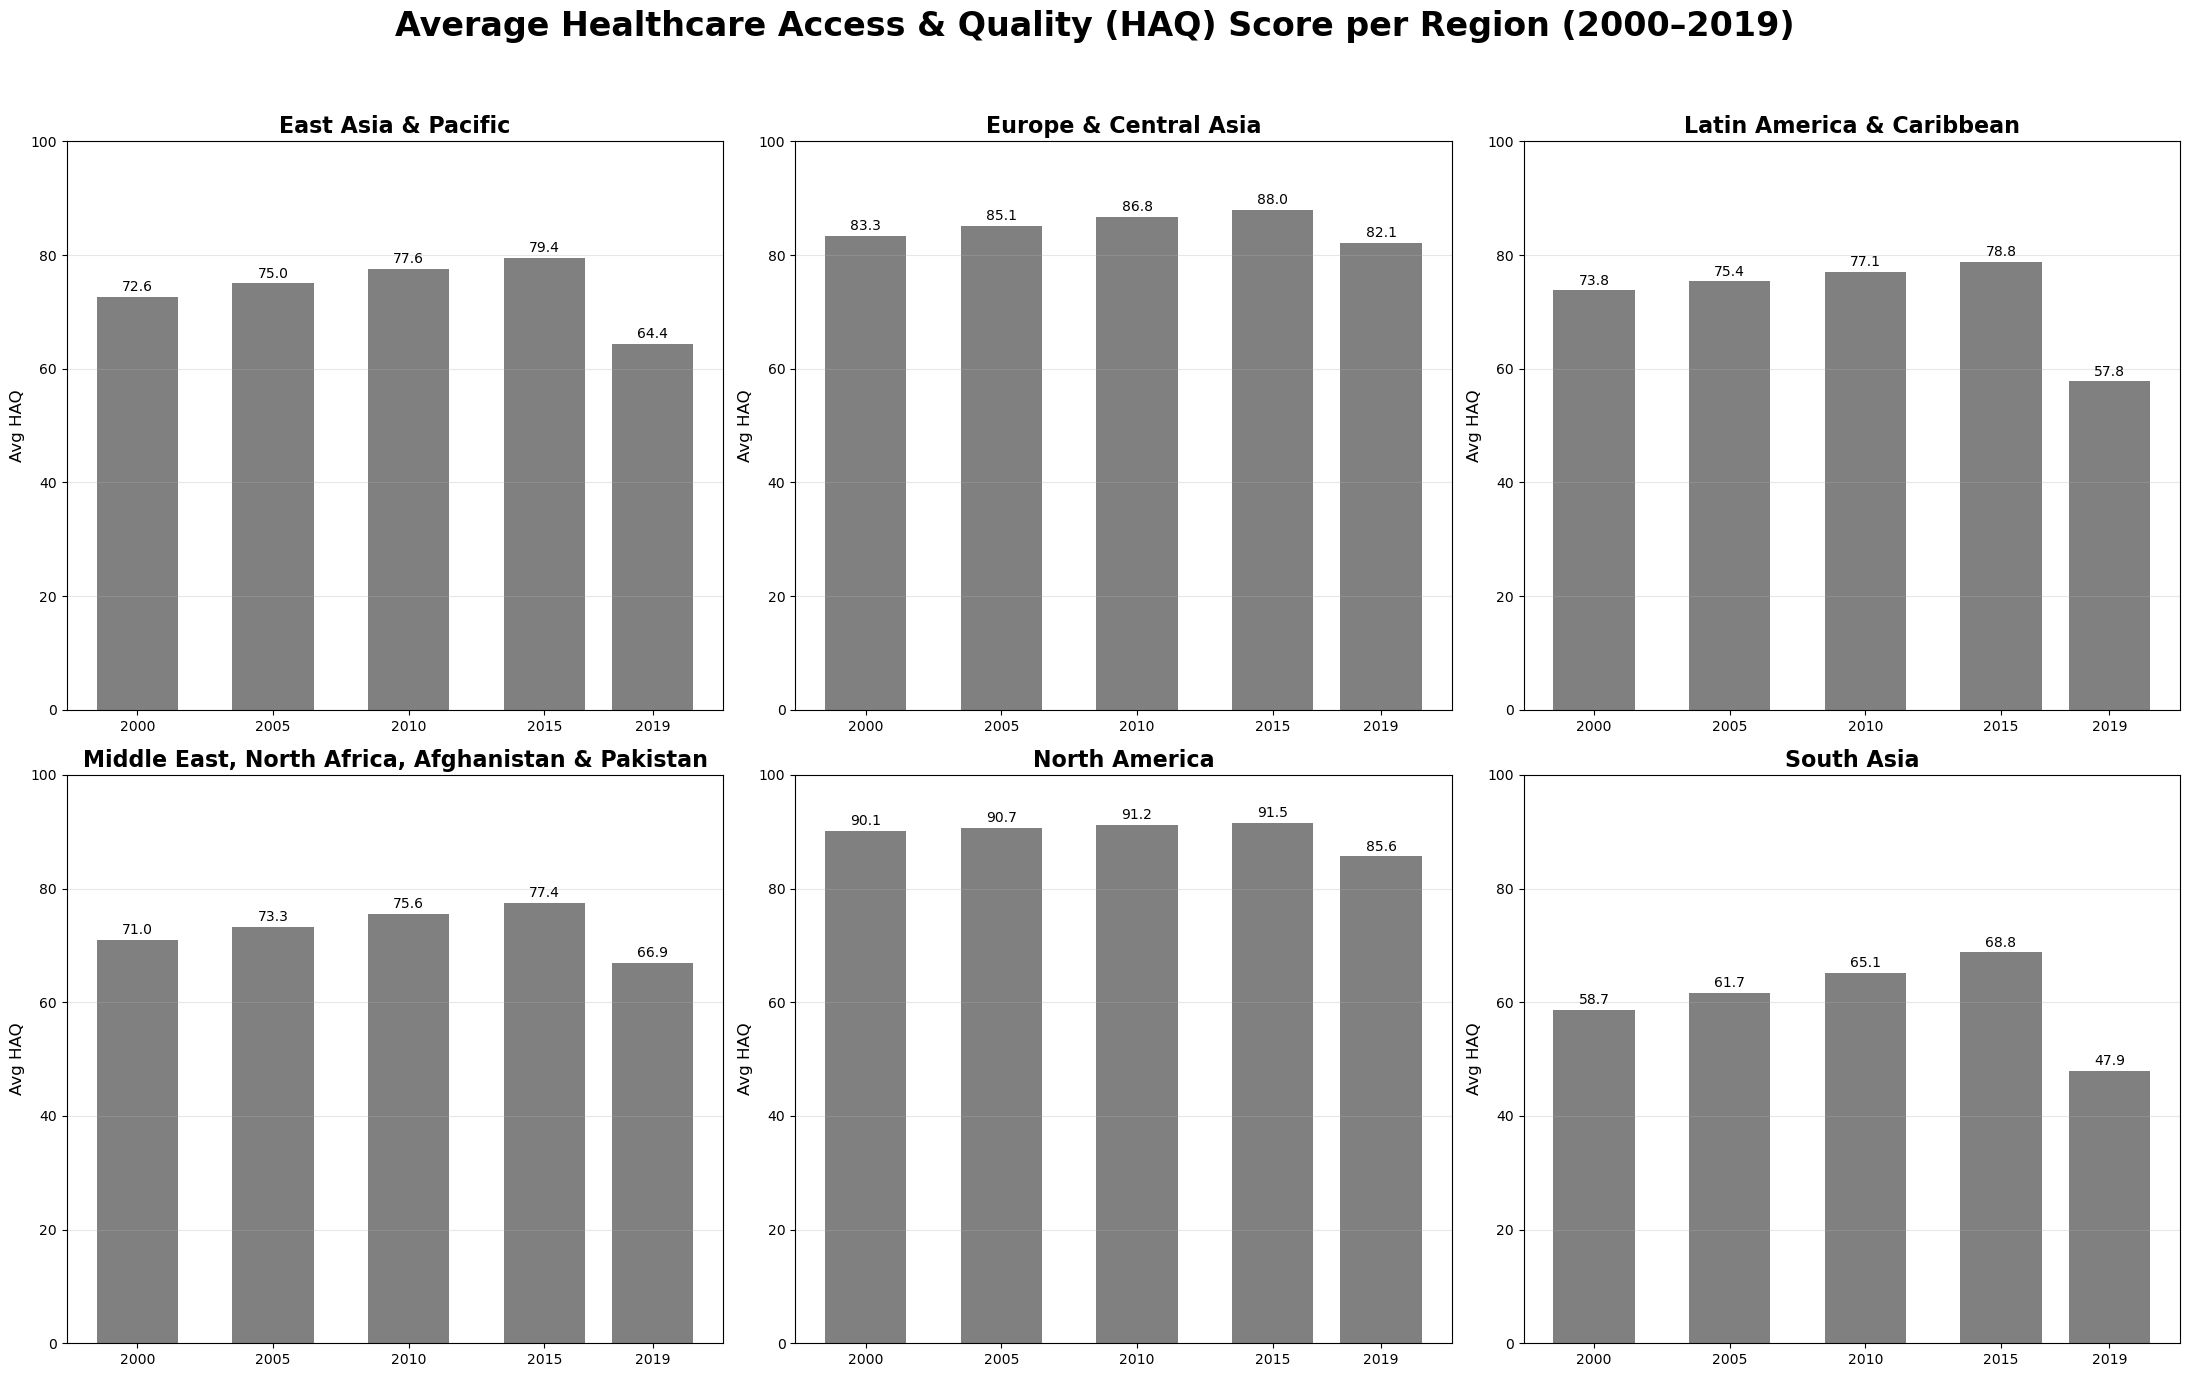

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Ensure Year is numeric
df[year_col] = df[year_col].astype(int)

# Fixed year ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Regions
regions = sorted(df[region_col].dropna().unique())
n_regions = len(regions)

# Grid layout (2 rows x 3 columns = 6 graphs)
cols = 3
rows = math.ceil(n_regions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(22, 14))
axes = axes.flatten()

fig.suptitle(
    "Average Healthcare Access & Quality (HAQ) Score per Region (2000–2019)",
    fontsize=24, weight="bold", y=0.98
)

# -----------------------------------------------------
#   PLOT EACH REGION IN ITS OWN SUBPLOT
# -----------------------------------------------------
for i, region in enumerate(regions):

    ax = axes[i]

    df_r = df[df[region_col] == region]

    # Average HAQ by year
    df_avg = (
        df_r.groupby(year_col)[haq_col]
        .mean()
        .reindex(year_ticks)
    )

    # Bar chart (gray)
    ax.bar(df_avg.index, df_avg.values, color="gray", width=3.0)

    # Value labels
    for x, y in zip(df_avg.index, df_avg.values):
        if pd.notna(y):
            ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

    # Title per region
    ax.set_title(region, fontsize=16, weight='bold')

    ax.set_ylim(0, 100)
    ax.set_xticks(year_ticks)
    ax.set_xticklabels(year_ticks, fontsize=10)
    ax.set_ylabel("Avg HAQ", fontsize=12)
    ax.grid(axis="y", alpha=0.3)

# Remove unused subplots (if any)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save final combined figure
plt.savefig("ALL_regions_6graphs_HAQ_avg.png", dpi=300, bbox_inches="tight")
plt.show()
